# DDoS attacks detection and characterization

First, we need to import the necessary libraries.

In [2]:
# import needed python libraries

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import colorcet as cc
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score, silhouette_samples

## Unsupervised learning - classification
Now we load the transformed dataset from the csv we created in the previous jupyter notebook.

In [3]:
# Load the dataset
df = pd.read_csv("preprocessed_dataset.csv", header=0, index_col=0, engine='python')

df

,Source IP,Source Port,Destination Port,Total Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Fwd IAT Min,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,Active Max,Active Min,Idle Std,Idle Min,Inbound,protocol_0,label
0,-0.036507,-0.996890,1.463534,0.169121,-0.297075,-0.172277,-0.069596,-0.146261,-0.765426,-0.014034,...,-0.266314,-0.102881,1.765456,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_dns
1,1.464073,-0.996890,1.463534,-0.036372,-0.297075,-0.172277,-0.069596,-0.146261,-0.324952,-0.014030,...,-0.266314,-0.102881,-0.265447,-0.044084,-0.037205,-0.165955,-0.194882,-3.381206,-0.030062,ddos_dns
2,-0.036507,-0.996890,0.770389,0.391920,-0.297075,-0.172277,-0.069596,-0.146261,-0.765114,-0.014034,...,-0.266314,-0.102881,3.967382,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_dns
3,-0.036507,-0.996890,-0.924976,0.391920,-0.297075,-0.172277,-0.069596,-0.146261,-0.765106,-0.014034,...,-0.266314,-0.102881,3.967382,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_dns
4,-0.036507,-0.996890,-0.139438,0.391920,-0.297075,-0.172277,-0.069596,-0.146261,-0.764174,-0.014038,...,-0.266314,-0.102881,3.967382,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_dns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65995,-0.036507,0.540571,1.589149,-0.036372,-0.408056,-0.172277,-0.069596,-0.146261,-0.013555,-0.014034,...,-0.266314,-0.102881,-0.265447,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_udp_lag
65996,-0.036507,1.350236,-0.577568,-0.027720,-0.377323,0.521580,-0.069596,-0.146261,-0.766925,-0.014034,...,-0.266314,-0.102881,-0.179935,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_udp_lag
65997,-0.036507,0.843239,1.670387,-0.036372,-0.408056,-0.172277,-0.069596,-0.146261,-0.013555,-0.014034,...,-0.266314,-0.102881,-0.265447,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_udp_lag
65998,-0.036507,1.433360,-0.996433,-0.032046,-0.384152,0.501315,-0.069596,-0.146261,-0.766921,-0.014034,...,-0.266314,-0.102881,-0.222691,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_udp_lag


In [4]:
X = df.drop(columns = 'label').to_numpy()
y = df['label'].values

#### PCA
Later on we will visualize the obtained clusters using PCA.

In [5]:
#2D PCA
pca = PCA(n_components=2)
projection = pca.fit_transform(X)
projection = pd.DataFrame(projection)

#### T-SNE

<a href="https://www.datacamp.com/tutorial/introduction-t-sne">t-SNE</a> (t-distributed Stochastic Neighbor Embedding) is a powerful technique for dimensionality reduction and data visualization. It is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data.

Perplexity is an important hyperparameter for the t-SNE algorithm. It controls the effective number of neighbors that each point considers during the dimensionality reduction process. 
We will run a loop to get the Kullback-Leibler (KL) Divergence metric between the high and low-dimensional probability distributions, on various perplexities from 5 to 125 with a 5-point gap. Low KL divergence is normally a sign of better results.

Complexity: $O(n^2)$


In [13]:
perplexity = np.arange(5, 125, 5)

In [ ]:
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X)
    divergence.append(model.kl_divergence_)

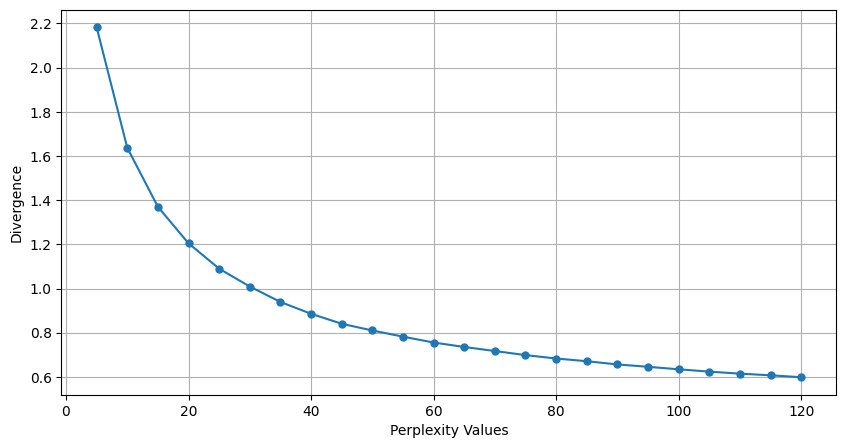

In [121]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(perplexity, divergence, marker='o', markersize=5)
# plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Perplexity Values')
plt.ylabel('Divergence')
plt.show()

We can consider the KL Divergence as constant after 100 perplexity. So, we will use 115 perplexity in the t-SNE algorithm.

In [20]:
# 2D T-SNE
tsne = TSNE(n_components=2, perplexity=115)
projection_tsne = tsne.fit_transform(X)
projection_tsne = pd.DataFrame(projection_tsne)
print("KL divergence: ",tsne.kl_divergence_)

KL divergence:  0.6077336668968201


## K-means
**k-Means** is a hard clustering approach (each sample is associated with one and only one cluster), that partitions m observations to k clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid).
Reference link: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans">K-means in sklearn</a>.

Regarding the ``init`` hyper-parameter, we leave the default option *k-means++* because it will make it so that the centroids will be equally distant from each other, thus provably leading to better results.  

In [32]:
# k-means
# k-Means with n_clusters = 12, which is the number of labels
kmeans = KMeans(n_clusters=12)
# Fits the k-means algorithm to the dataset X and Predicts cluster labels for each data point
cl_labels12 = kmeans.fit_predict(X) 

# Unsupervised metric
silhouette  = silhouette_score(X, cl_labels12)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_labels12)
ari = adjusted_rand_score(np.ravel(y), cl_labels12)

print('k-Means with 12 clusters')
(unique, counts)=np.unique( cl_labels12, return_counts=True)
print("Size of each cluster: ", counts)
print(f'k_means clustering error: {round(kmeans.inertia_, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

k-Means with 12 clusters
Size of each cluster:  [ 2038 28386    27  9047 19006   163   551   592  2164     5    38  2222]
k_means clustering error: 926049.38
Silhouette: 0.33
RI: 0.76
ARI: 0.28


The silhouette ranges between -1 and 1, where 1 indicates that the object is well matched with its own cluster and poorly matched to the others, while scores around zero indicates overlapping clusters.

We want to understand which is the optimal ``n_clusters`` to use in terms of the clustering error and, particularly, the silhoutte. We already know that the clustering error favours an higher number: by increasing the number of clusters the average distance from the points to the corresponding cluster means (which defines the clustering error) can not decrease.

In [5]:
n_cluster_list=[]
shs_list = []
ri_list = []
ari_list = []
inertia_list=[]

In [6]:

for n_clusters in range(10, 40):
    kmeans = KMeans(n_clusters=n_clusters)
    cl_labels = kmeans.fit_predict(X)
    # Unsupervised metric
    silhouette  = silhouette_score(X, cl_labels)
    n_cluster_list.append(n_clusters)
    shs_list.append(silhouette)
    ri_list.append(rand_score(np.ravel(y), cl_labels))
    ari_list.append(adjusted_rand_score(np.ravel(y), cl_labels))
    inertia_list.append(kmeans.inertia_)
    print(f"{n_clusters} clusters: clustering_error {round(kmeans.inertia_, 2)}, silhouette {round(silhouette, 2)}")

10 clusters: clustering_error 1040244.31, silhouette 0.37
11 clusters: clustering_error 948594.15, silhouette 0.36
12 clusters: clustering_error 876067.48, silhouette 0.35
13 clusters: clustering_error 864300.53, silhouette 0.38
14 clusters: clustering_error 841740.05, silhouette 0.36
15 clusters: clustering_error 744221.68, silhouette 0.39
16 clusters: clustering_error 706150.08, silhouette 0.39
17 clusters: clustering_error 609595.13, silhouette 0.39
18 clusters: clustering_error 622900.37, silhouette 0.4
19 clusters: clustering_error 553908.61, silhouette 0.37
20 clusters: clustering_error 496869.79, silhouette 0.42
21 clusters: clustering_error 518094.52, silhouette 0.41
22 clusters: clustering_error 458763.0, silhouette 0.42
23 clusters: clustering_error 472183.42, silhouette 0.41
24 clusters: clustering_error 437240.82, silhouette 0.39
25 clusters: clustering_error 361126.4, silhouette 0.43
26 clusters: clustering_error 368464.62, silhouette 0.44
27 clusters: clustering_error 370

best k:  34  with corresponding silhouette:  0.4541468680216116


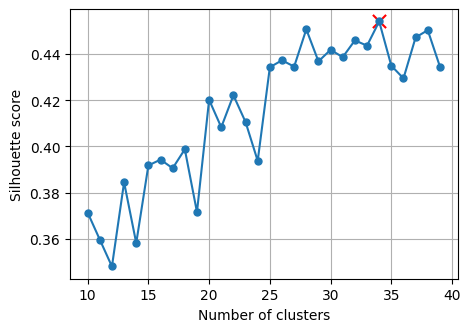

In [12]:
# Get n_clusters leading to the highest silhouette
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)

# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

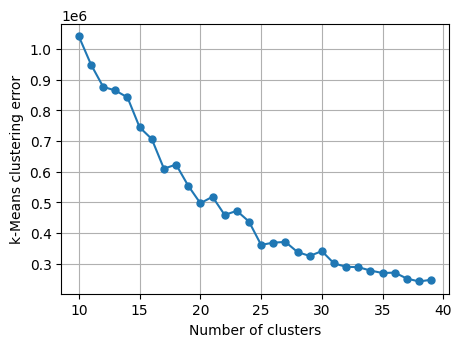

In [13]:
# Plot k-Means clustering error
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,inertia_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('k-Means clustering error')
plt.show()

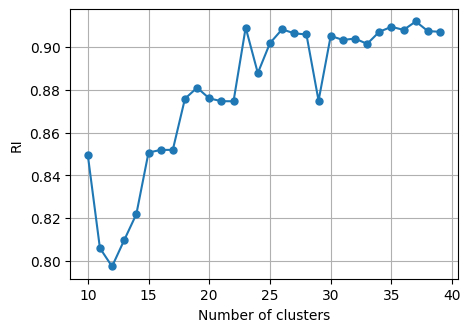

In [14]:
# Plot RI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ri_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('RI')
plt.show()

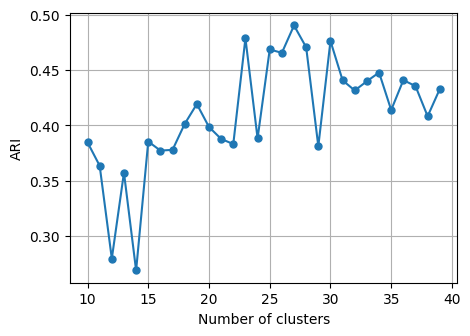

In [15]:
# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ari_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

In [13]:
# k-means
# k-Means with n_clusters = best_n, which is the number of labels
kmeans = KMeans(n_clusters=best_n)
# Fits the k-means algorithm to the dataset X and Predicts cluster labels for each data point
cl_labels = kmeans.fit_predict(X) 

# Unsupervised metric
silhouette  = silhouette_score(X, cl_labels)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_labels)
ari = adjusted_rand_score(np.ravel(y), cl_labels)

print(f'k-Means with {best_n} clusters')
(unique, counts)=np.unique( cl_labels, return_counts=True)
print("Size of each cluster: ", counts)
print(f'k_means clustering error: {round(kmeans.inertia_, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

k-Means with 34 clusters
Size of each cluster:  [9882 5001 7447   27 2134 4075   42    4  494 7425  159 1119   38  510
    2 1511   30  240    5   74  163 1451 8893    1  124  602   27   48
 4588    5  272 7044  343  459]
k_means clustering error: 282467.89
Silhouette: 0.42
RI: 0.89
ARI: 0.36


### PCA clusters visualization
Now we want to analyse the clusters.
Let's reduce the feature dimensionality with a 2-component PCA and get the scatter plots of the samples on the 2-components which explain the majority of variance in the data.
We will show three plots:

        1. K-Means with 12 clusters
        2. Best K-Means clusters found in the previous analysis       
        3. Original labels


In [15]:
#running again k-Means with k=12 and best k to save the labels
kmeans = KMeans(n_clusters=best_n)
cl_labels = kmeans.fit_predict(X)
kmeans12 = KMeans(n_clusters=12)
cl_labels12 = kmeans12.fit_predict(X)

# Assign the cluster labels to the projection DataFrame
projection['cid3_KM'] = [f'C{x}' for x in cl_labels12]
projection['cidBest_KM'] = [f'C{x}' for x in cl_labels]
projection['label'] = y.reshape(-1)

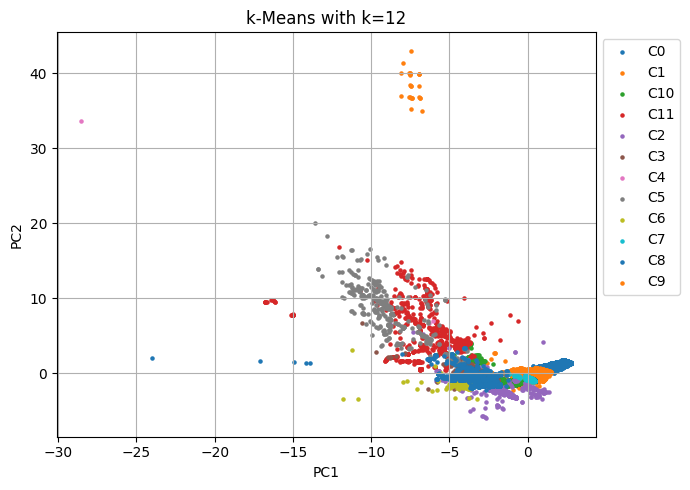

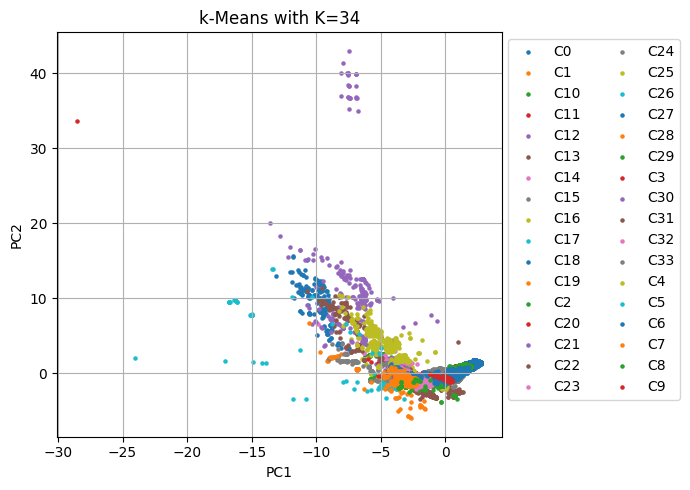

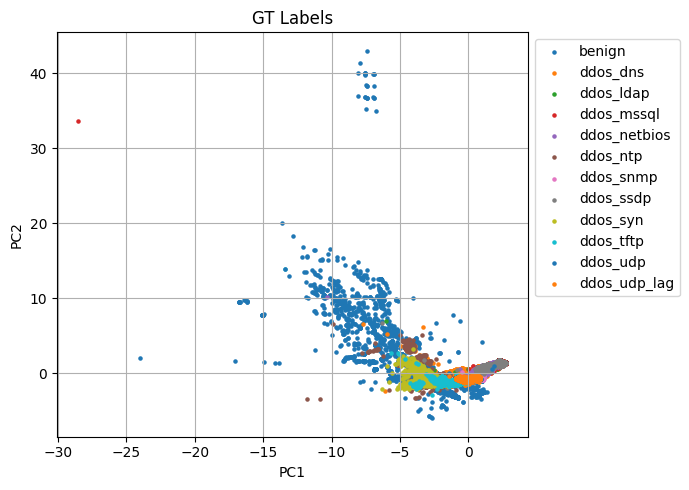

In [27]:
# First plot: k-Means with k=12
plt.figure(figsize=(7, 5))
for i in np.unique(projection.cid3_KM):
    subdf = projection[projection.cid3_KM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k-Means with k=12')
plt.tight_layout()
plt.show()

# Second plot: k-Means with best k
plt.figure(figsize=(7, 5))
for i in np.unique(projection.cidBest_KM):
    subdf = projection[projection.cidBest_KM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'k-Means with K={best_n}')
plt.tight_layout()
plt.show()

# Third plot: Ground Truth (GT) Labels
plt.figure(figsize=(7, 5))
for i in np.unique(y):
    subdf = projection[projection.label == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GT Labels')
plt.tight_layout()
plt.show()

### t-SNE clusters visualization
Now, we want to obtain the previous results but using 2-components t-SNE, instead of 2-componens PCA.

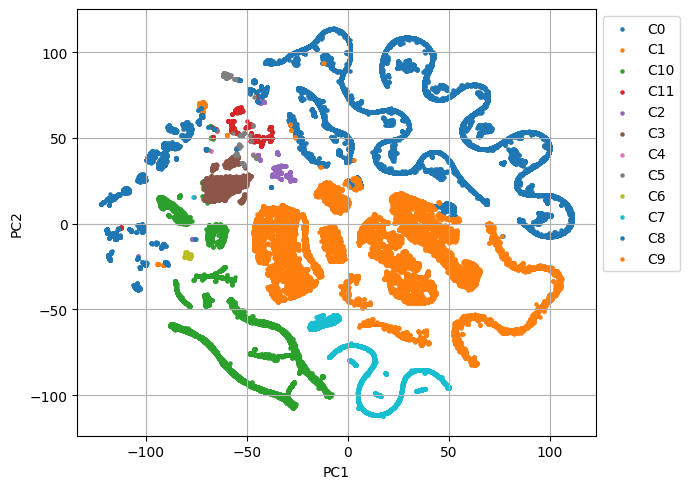

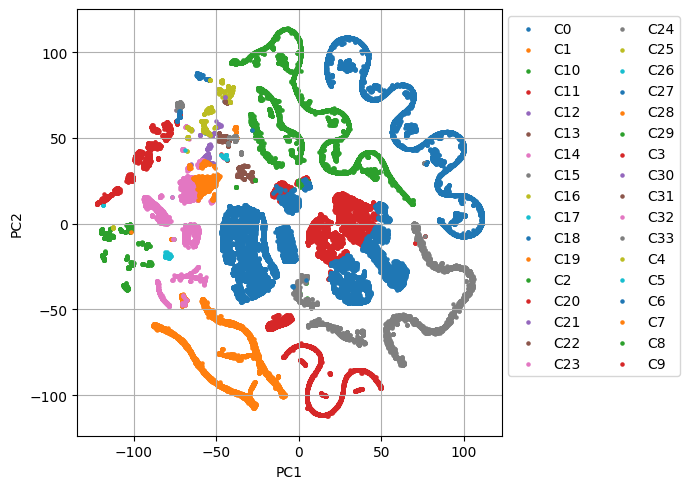

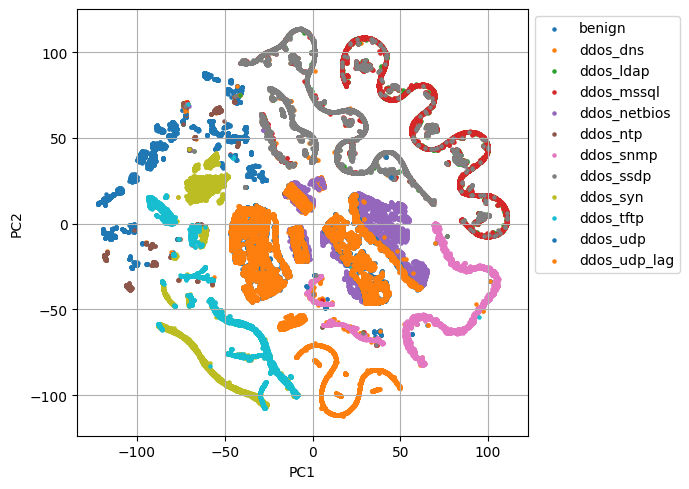

In [28]:
# Assign the cluster labels to the projection DataFrame
projection_tsne['cid3_KM'] = [f'C{x}' for x in cl_labels12]
projection_tsne['cidBest_KM'] = [f'C{x}' for x in cl_labels]
projection_tsne['label'] = y.reshape(-1)

# First plot: k-Means with k=12
plt.figure(figsize=(7, 5))
for i in np.unique(projection_tsne.cid3_KM):
    subdf = projection_tsne[projection_tsne.cid3_KM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

# Second plot: k-Means with best k
plt.figure(figsize=(7, 5))
for i in np.unique(projection_tsne.cidBest_KM):
    subdf = projection_tsne[projection_tsne.cidBest_KM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

# Third plot: Ground Truth (GT) Labels
plt.figure(figsize=(7, 5))
for i in np.unique(y):
    subdf = projection_tsne[projection_tsne.label == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

#### Clusters analysis

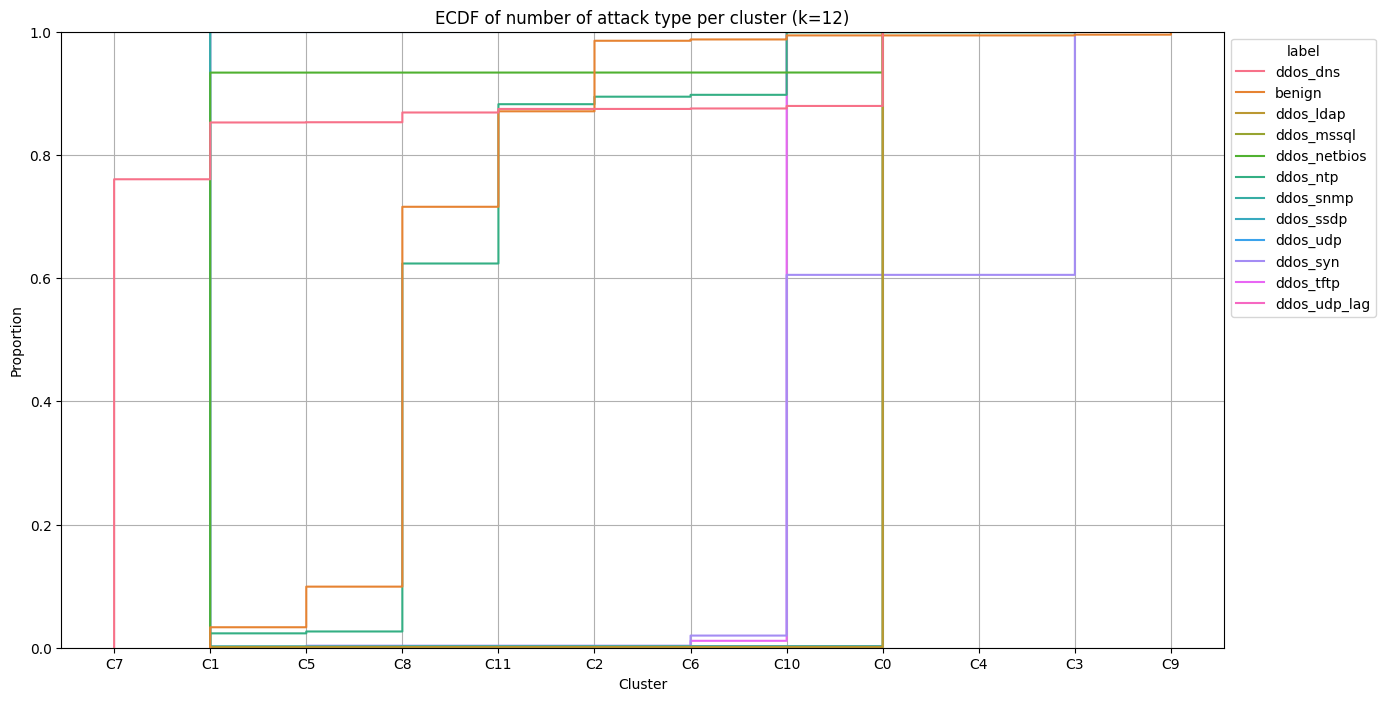

In [18]:
# ECDF of number of attack type  per cluster (k=12)
plt.figure(figsize=(15, 8))
ax = sns.ecdfplot(data=projection, x='cid3_KM', hue='label')
sns.move_legend(ax, loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('ECDF of number of attack type per cluster (k=12)')
plt.grid()
plt.show()

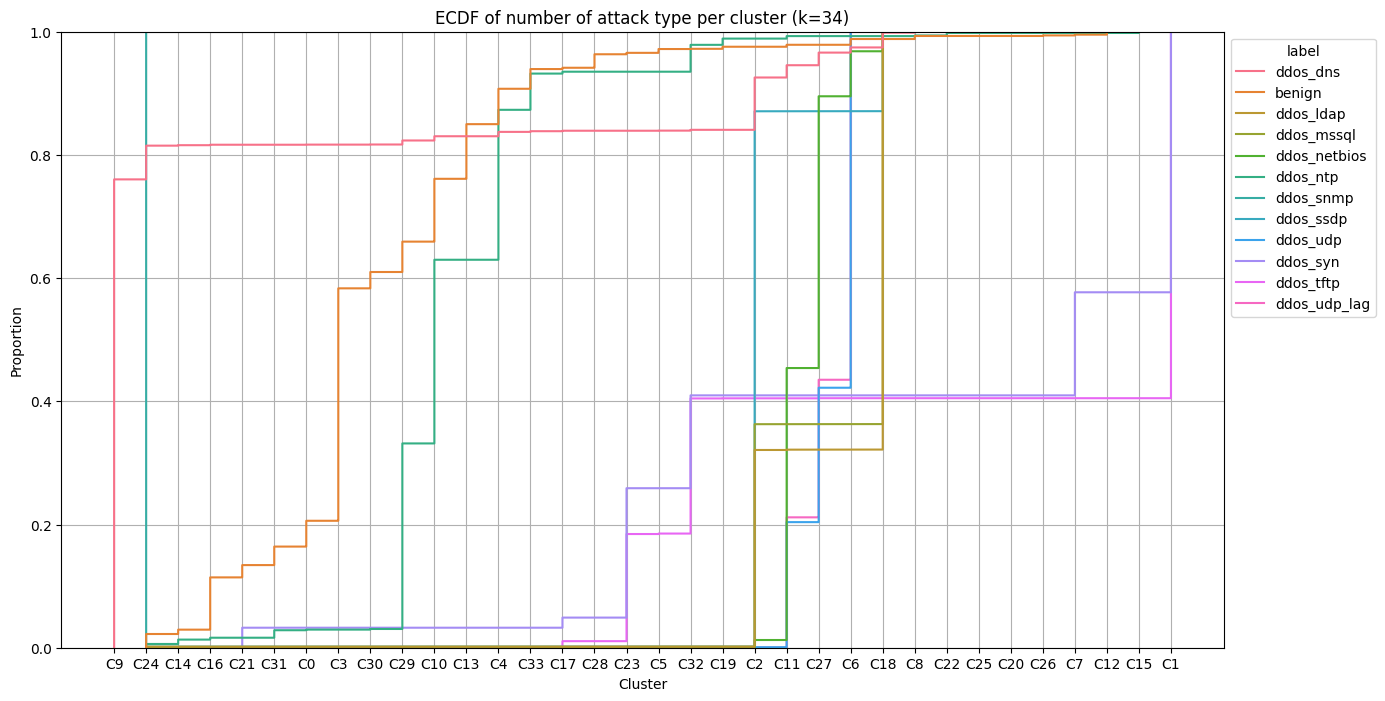

In [19]:
# ECDF of number of attack type per cluster (k=best_n)
plt.figure(figsize=(15, 8))
ax = sns.ecdfplot(data=projection, x='cidBest_KM', hue='label')
sns.move_legend(ax, loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title(f'ECDF of number of attack type per cluster (k={best_n})')
plt.grid()
plt.show()

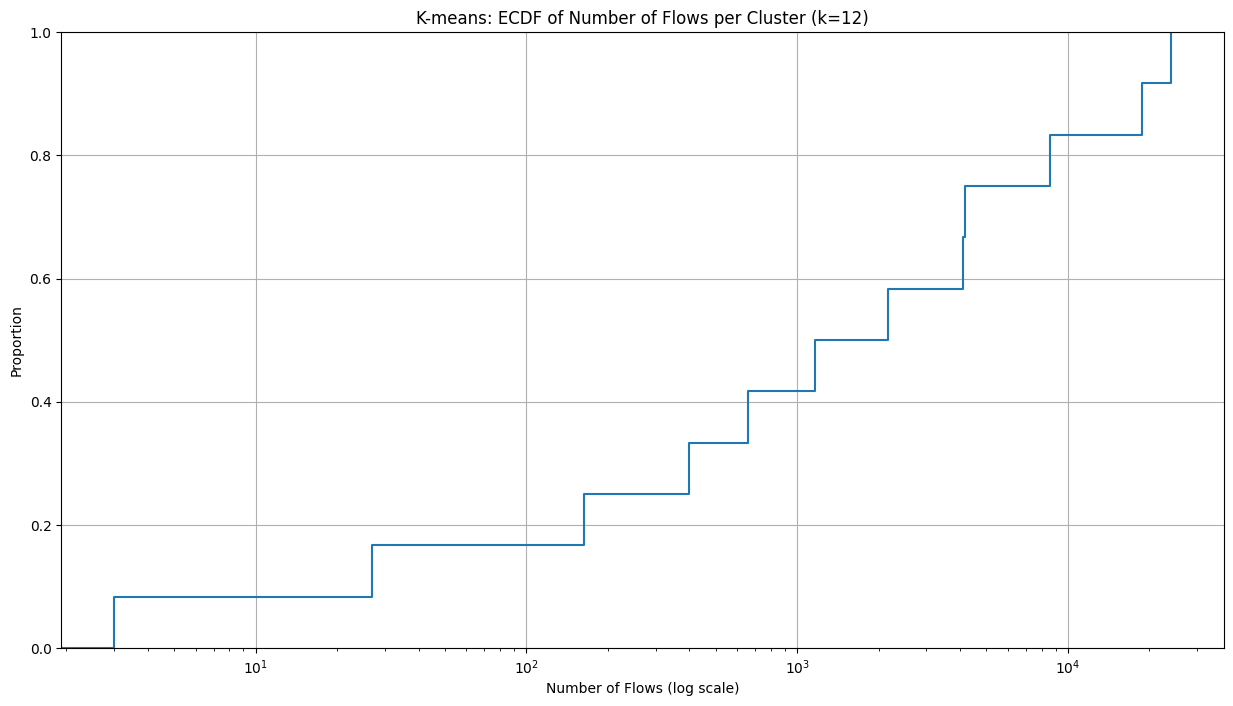

In [20]:
cluster_labels = projection.cid3_KM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title('K-means: ECDF of Number of Flows per Cluster (k=12)')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

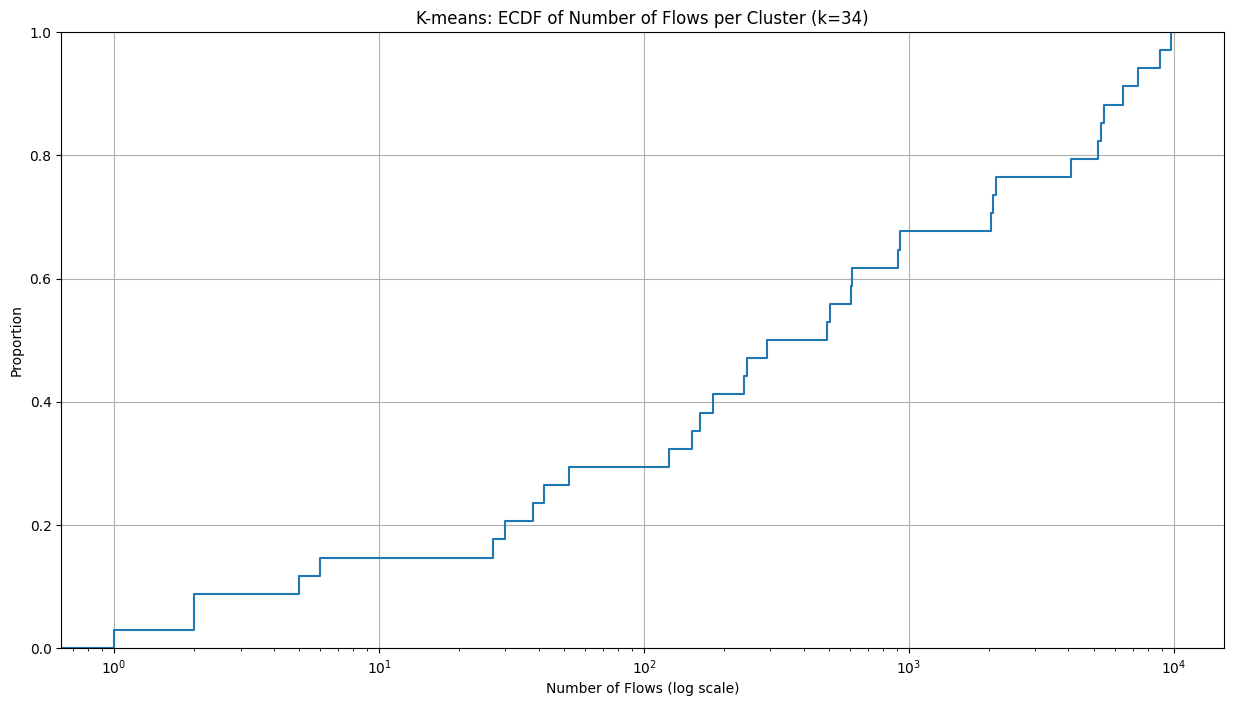

In [21]:
cluster_labels = projection.cidBest_KM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title(f'K-means: ECDF of Number of Flows per Cluster (k={best_n})')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

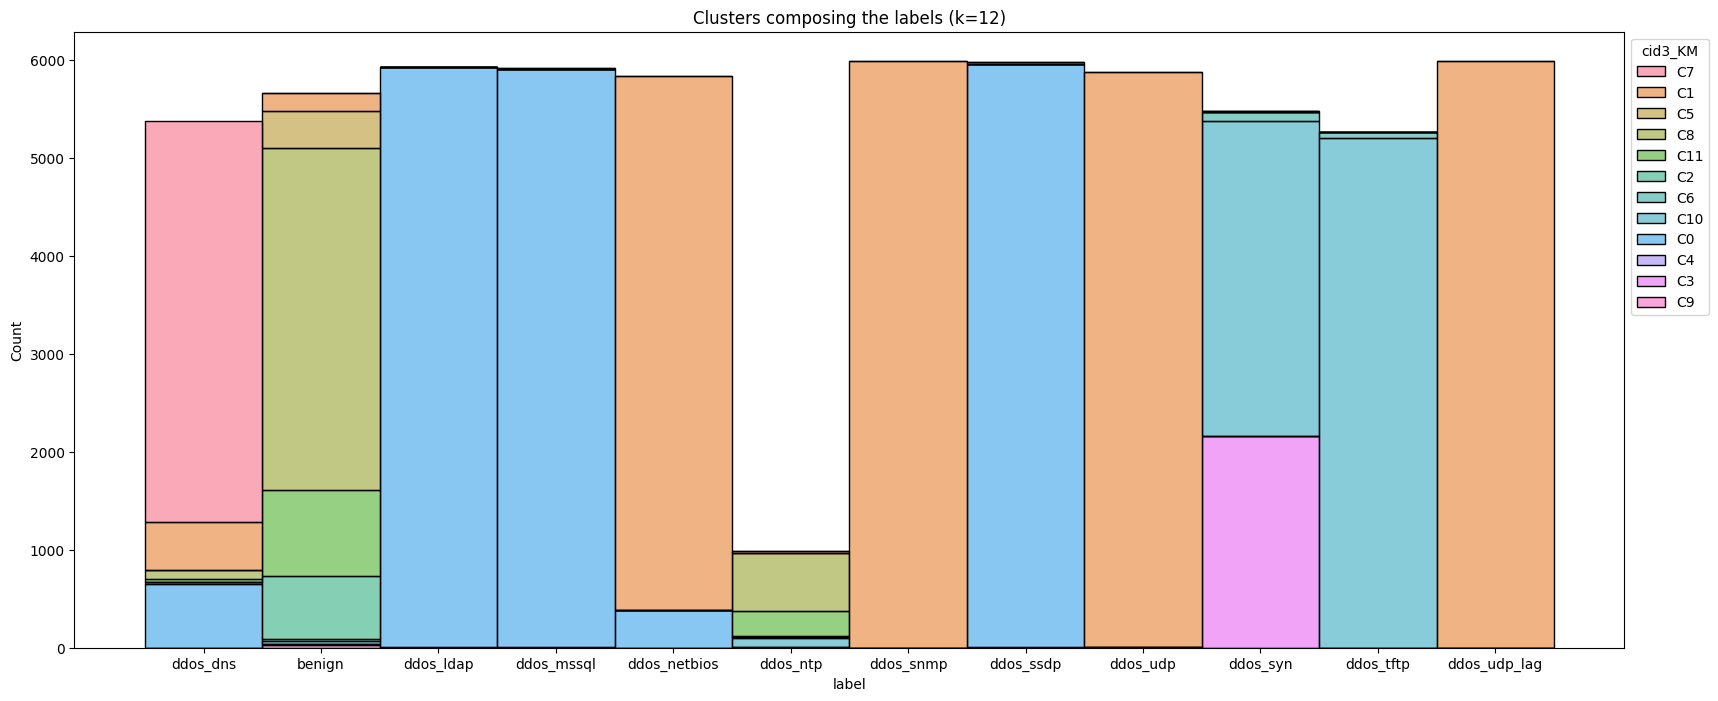

In [22]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "label", 
    hue = "cid3_KM",
    multiple="stack",
    alpha = 0.6
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels (k=12)')
plt.show()

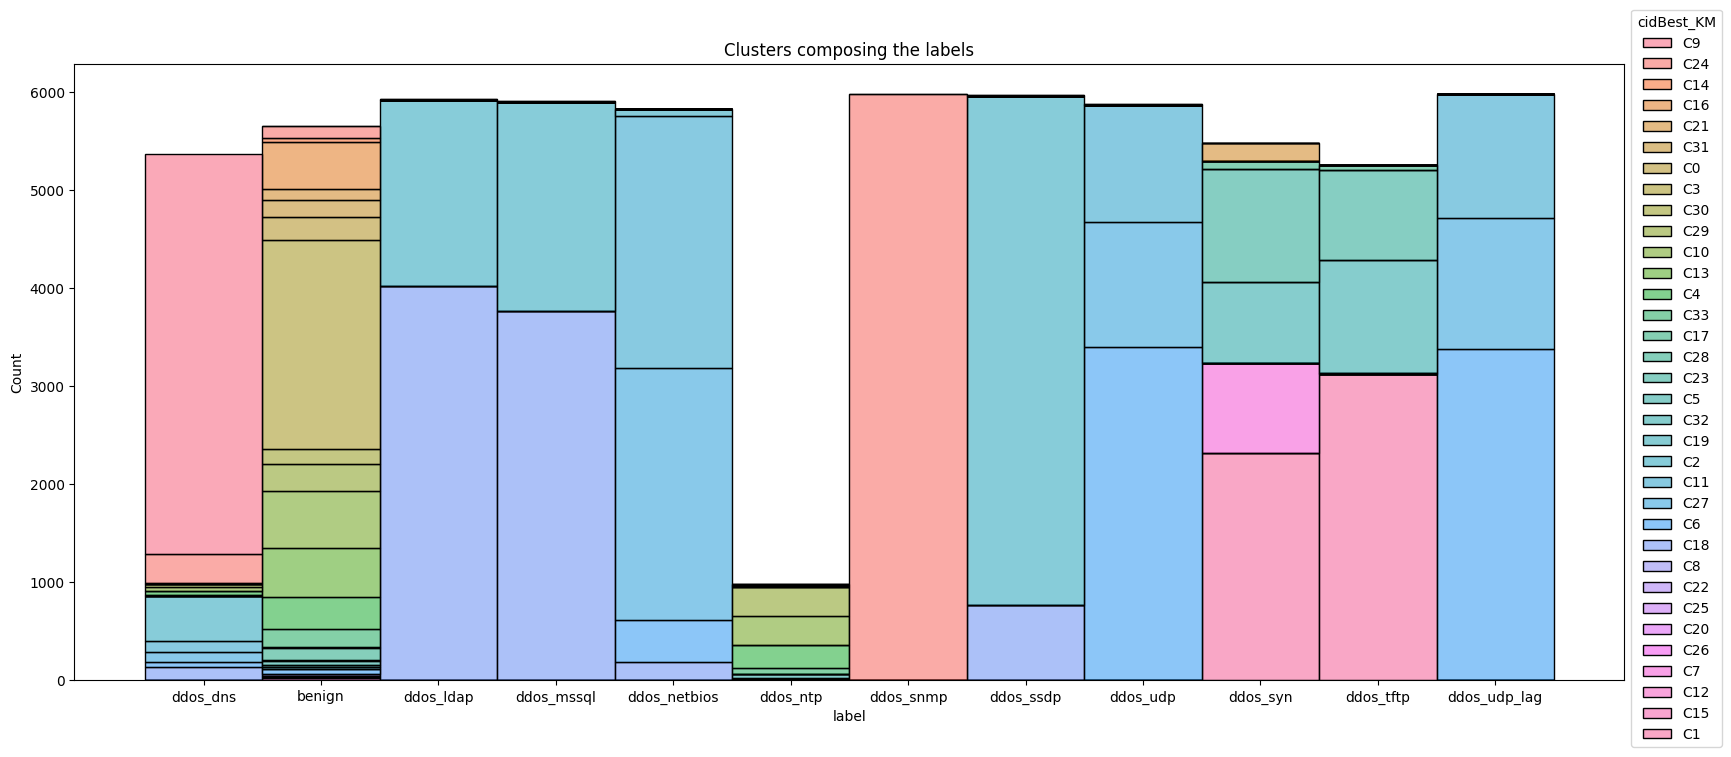

In [24]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "label", 
    hue = "cidBest_KM",
    multiple="stack",
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.1))
#plt.yscale("log")
plt.title('Clusters composing the labels')
plt.show()

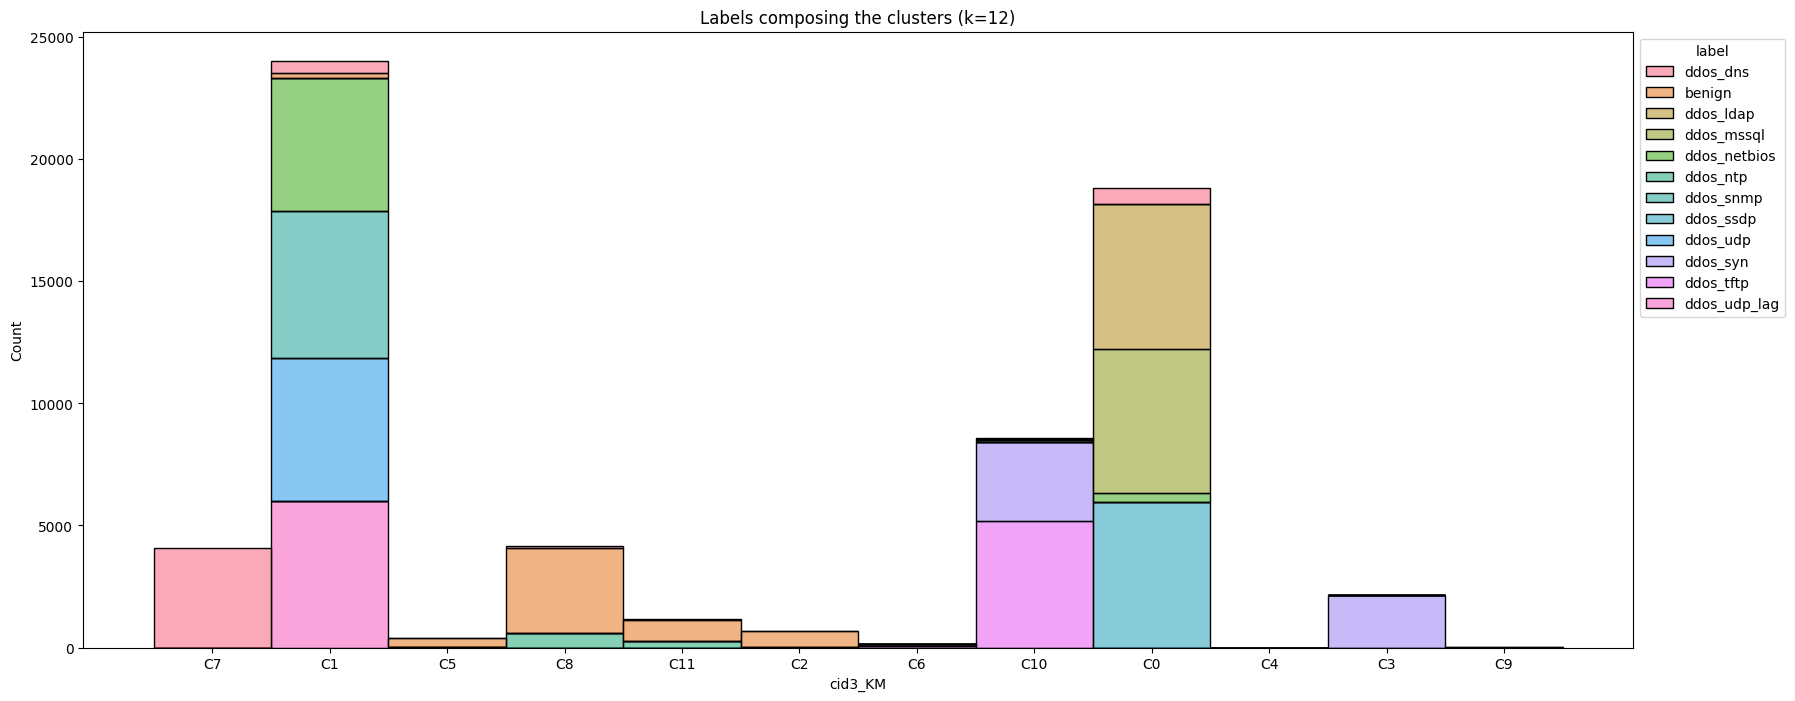

In [25]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "cid3_KM", 
    hue = "label", 
    multiple="stack",
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters (k=12)')
plt.show()

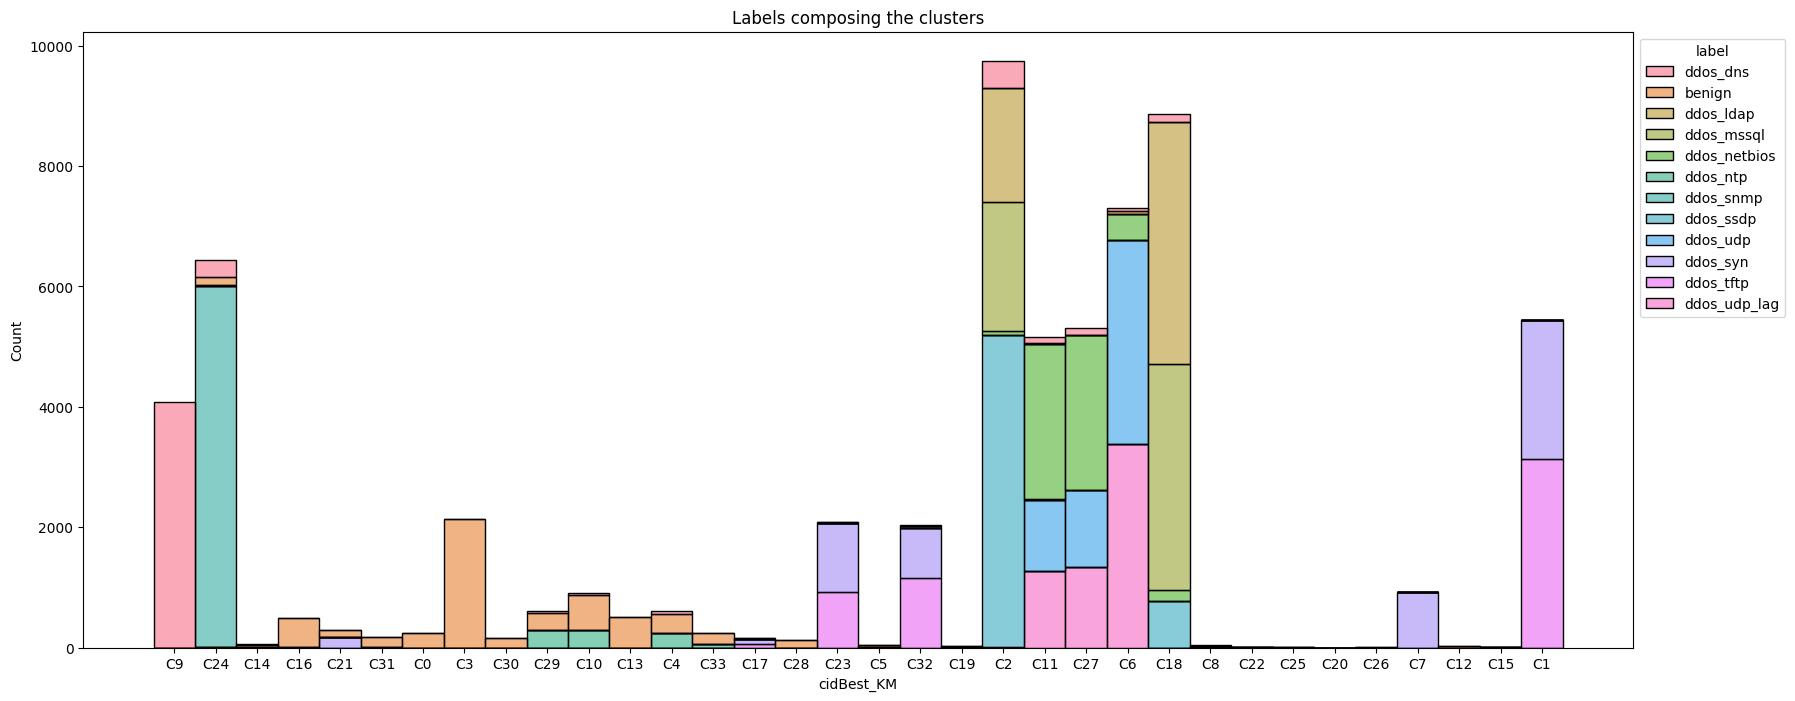

In [26]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "cidBest_KM", 
    hue = "label", 
    multiple="stack",
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters')
plt.show()

## Gaussian Mixture Model
**Gaussian mixture model (GMM)** is a **soft** clustering approach that provides the degree of beloging of each of the m observatios to k different clusters. Each cluster is represented by a gaussian distribution.  
Useful links: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html">GMM in sklearn</a>.

``n_components`` indicates the number of clusters to use.
``init_params`` indicates the method used to initialize the weights, the means and the precisions.

In [80]:
# GMM
# GMM with n_components=12 - which is the number of labels
gmm= GaussianMixture(n_components = 12)
cl_gmm_labels12 = gmm.fit_predict(X) # Get cluster ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_gmm_labels12)
log_l=gmm.score(X)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_gmm_labels12)
ari = adjusted_rand_score(np.ravel(y), cl_gmm_labels12)

print('GMM with 12 clusters')
# report effective size
print("Effetive size of each cluster: ", gmm.weights_)

# report usupervised and supervised metric
print(f'GMM total log-likelihood score:, {round(log_l, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')


GMM with 12 clusters
Effetive size of each cluster:  [0.03482308 0.07506933 0.14971668 0.12945407 0.03855693 0.00042031
 0.34563072 0.00084061 0.16258036 0.03711141 0.02515826 0.00063824]
GMM total log-likelihood score:, 125.06
Silhouette: 0.17
RI: 0.82
ARI: 0.26


In [19]:
n_cluster_list=[]
shs_list = []
ri_list = []
ari_list = []
log_l_list=[]


for n_clusters in range(10, 40):
    gmm = GaussianMixture(n_components=n_clusters)
    cl_gmm__labels = gmm.fit_predict(X)
    # Unsupervised metric
    silhouette  = silhouette_score(X, cl_gmm__labels)
    n_cluster_list.append(n_clusters)
    shs_list.append(silhouette)
    ri_list.append(rand_score(np.ravel(y), cl_gmm__labels))
    ari_list.append(adjusted_rand_score(np.ravel(y), cl_gmm__labels))
    log_l_list.append(gmm.score(X))

    print(f"{n_clusters} clusters: GMM total log-likelihood score: {round(gmm.score(X), 2)}, silhouette {round(silhouette, 2)}")

10 clusters: GMM total log-likelihood score: 119.32, silhouette 0.28
11 clusters: GMM total log-likelihood score: 121.28, silhouette 0.33
12 clusters: GMM total log-likelihood score: 118.49, silhouette 0.3
13 clusters: GMM total log-likelihood score: 122.5, silhouette 0.38
14 clusters: GMM total log-likelihood score: 121.75, silhouette 0.37
15 clusters: GMM total log-likelihood score: 126.04, silhouette 0.31
16 clusters: GMM total log-likelihood score: 123.09, silhouette 0.34
17 clusters: GMM total log-likelihood score: 123.88, silhouette 0.4
18 clusters: GMM total log-likelihood score: 128.66, silhouette 0.31
19 clusters: GMM total log-likelihood score: 130.04, silhouette 0.38
20 clusters: GMM total log-likelihood score: 135.22, silhouette 0.24
21 clusters: GMM total log-likelihood score: 133.95, silhouette 0.37
22 clusters: GMM total log-likelihood score: 130.85, silhouette 0.38
23 clusters: GMM total log-likelihood score: 136.6, silhouette 0.26
24 clusters: GMM total log-likelihood 

best k:  31  with corresponding silhouette:  0.42430455381386173


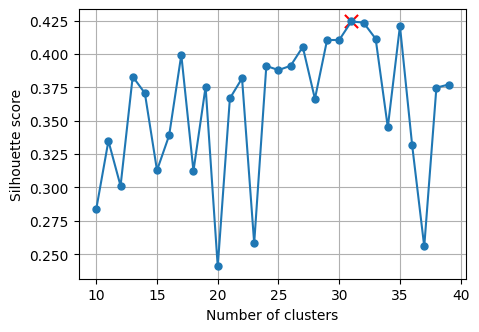

In [22]:
# Get n_clusters leading to the highest silhouette
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)

# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

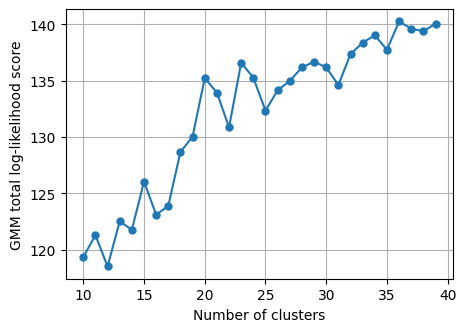

In [23]:
# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,log_l_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.show()

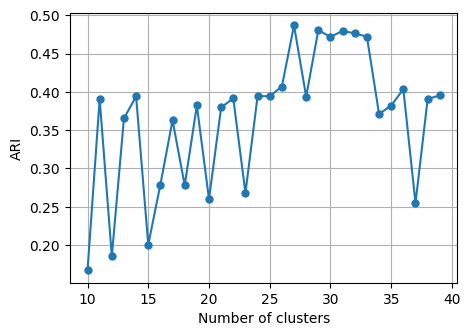

In [24]:
# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ari_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

Now, we will perform the GMM with the best parameter ``n_components``.

In [128]:
# GMM
# GMM with n_components=best_n
gmm = GaussianMixture(n_components = best_n)
cl_gmm_labels = gmm.fit_predict(X) # Get cluster ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_gmm_labels)
log_l=gmm.score(X)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_gmm_labels)
ari = adjusted_rand_score(np.ravel(y), cl_gmm_labels)

print(f'GMM with {best_n} clusters')
# report effective size
print("Effetive size of each cluster: ", gmm.weights_)

# report usupervised and supervised metric
print(f'GMM total log-likelihood score:, {round(log_l, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

GMM with 31 clusters
Effetive size of each cluster:  [1.44927914e-02 2.72471291e-01 9.31988356e-02 1.33770144e-01
 6.35595201e-02 3.73604820e-03 1.08194739e-02 3.31418573e-02
 4.20305422e-04 1.10524759e-03 3.11337350e-05 2.82890582e-03
 8.51819019e-02 5.91540964e-04 7.19189278e-03 2.17307815e-02
 6.53808434e-04 8.09477109e-04 1.48916385e-01 2.17936145e-04
 3.73604820e-04 2.83317342e-03 7.37519407e-03 3.04487519e-02
 1.66754895e-02 1.15194819e-03 3.49476175e-02 6.21644271e-03
 1.55668675e-05 3.14707442e-03 1.94585843e-03]
GMM total log-likelihood score:, 136.49
Silhouette: 0.4
RI: 0.87
ARI: 0.38


### PCA clusters visualization

In [32]:
# We reuse the same PCA as before

best_n = 31
#running again GMM with k=12 and best k to save the labels
gmm = GaussianMixture(n_components=best_n)
cl_labels = gmm.fit_predict(X)
gmm12 = GaussianMixture(n_components=12)
cl_labels12 = gmm12.fit_predict(X)

# Assign the cluster labels to the projection DataFrame
projection['cid3_GMM'] = [f'C{x}' for x in cl_labels12]
projection['cidBest_GMM'] = [f'C{x}' for x in cl_labels]
projection['label'] = y.reshape(-1)

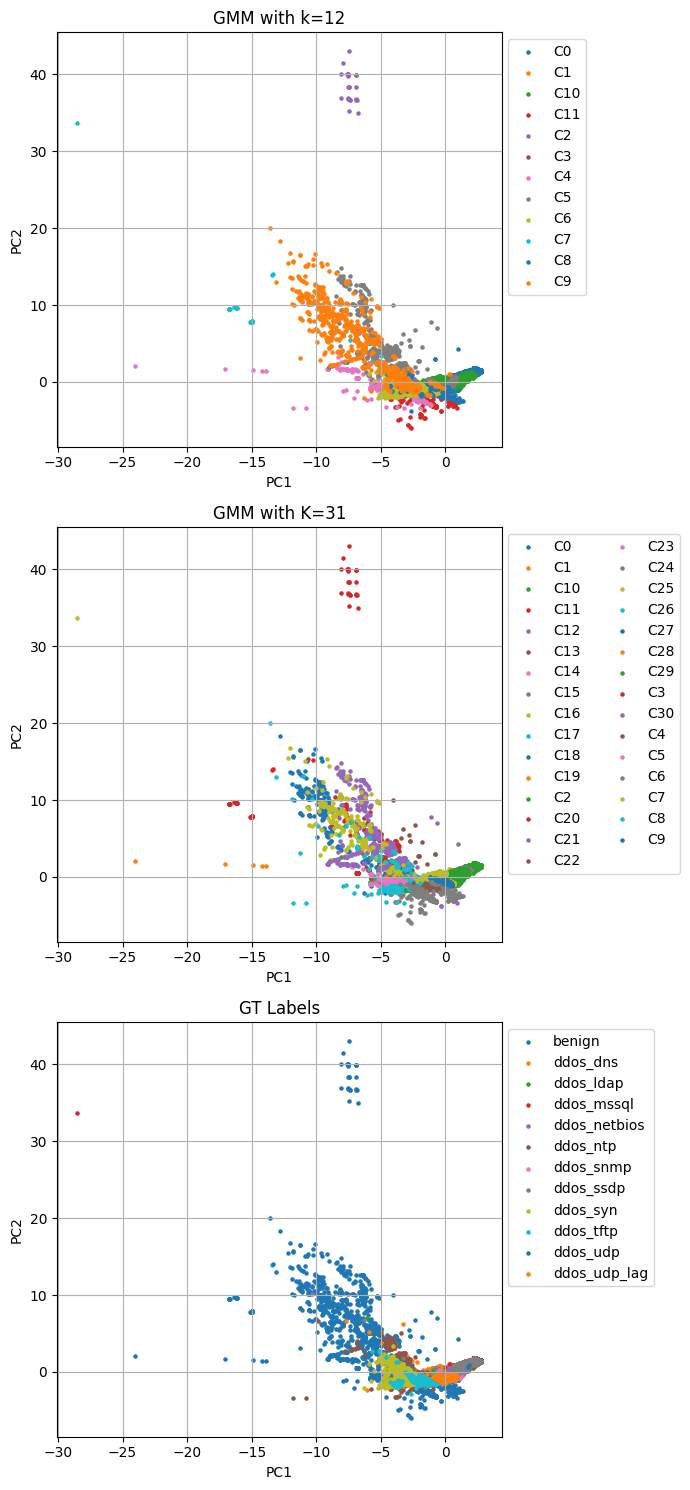

In [105]:
fig, axs = plt.subplots(3, 1, figsize=(7, 15))

# Each cluster is plotter separately with a unique color
for i in np.unique(projection.cid3_GMM):
    subdf = projection[projection.cid3_GMM==i]
    axs[0].scatter(subdf[0], subdf[1], label=i, s=5)
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title('GMM with k=12')
    
for i in np.unique(projection.cidBest_GMM):
    subdf = projection[projection.cidBest_GMM==i]
    axs[1].scatter(subdf[0], subdf[1], label=i, s=5)
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=2)

axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title(f'GMM with K={best_n}')

for i in np.unique(y):
    subdf = projection[projection.label==i]
    axs[2].scatter(subdf[0], subdf[1], label=i, s=5)
axs[2].grid()
lgnd = axs[2].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[2].set_xlabel('PC1')
axs[2].set_ylabel('PC2')
axs[2].set_title('GT Labels')


plt.tight_layout() #Ensures that the subplots do not overlap and fit neatly within the figure
plt.show()

### t-SNE clusters visualization

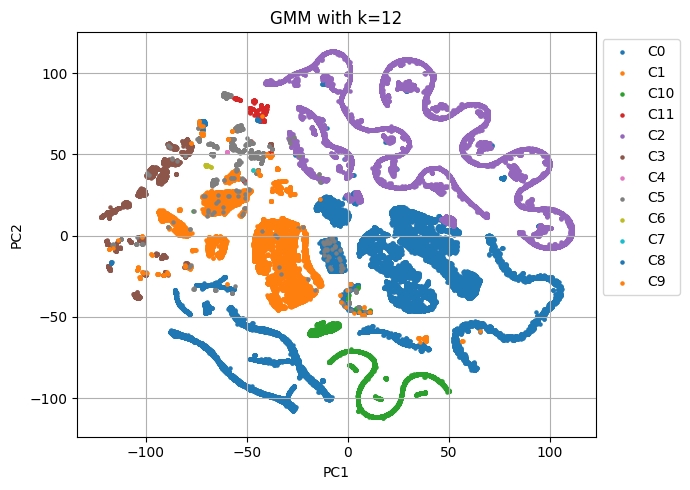

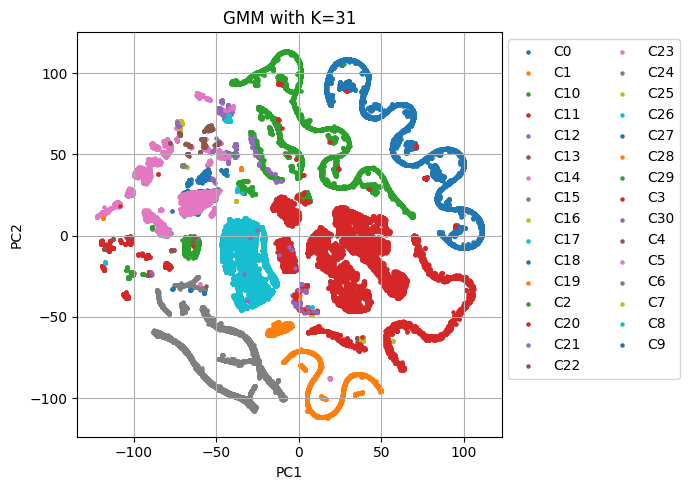

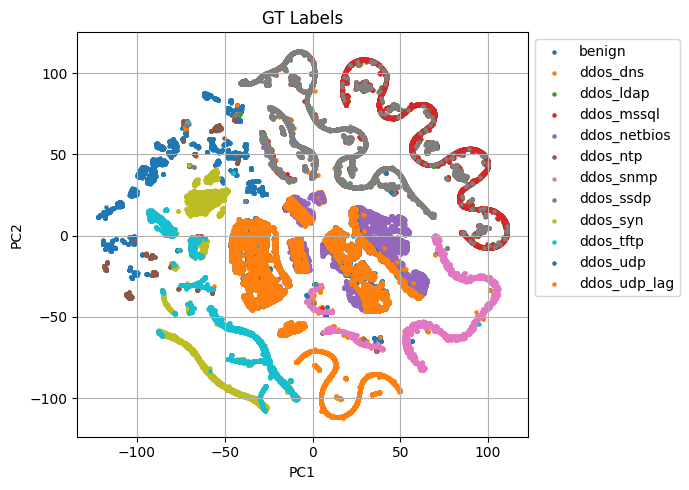

In [34]:
# Assign the cluster labels to the projection DataFrame
projection_tsne['cid3_GMM'] = [f'C{x}' for x in cl_labels12]
projection_tsne['cidBest_GMM'] = [f'C{x}' for x in cl_labels]
projection_tsne['label'] = y.reshape(-1)

# First plot: GMM with k=12
plt.figure(figsize=(7, 5))
for i in np.unique(projection_tsne.cid3_GMM):
    subdf = projection_tsne[projection_tsne.cid3_GMM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM with k=12')
plt.tight_layout()
plt.show()

# Second plot: GMM with best k
plt.figure(figsize=(7, 5))
for i in np.unique(projection_tsne.cidBest_GMM):
    subdf = projection_tsne[projection_tsne.cidBest_GMM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'GMM with K={best_n}')
plt.tight_layout()
plt.show()

# Third plot: Ground Truth (GT) Labels
plt.figure(figsize=(7, 5))
for i in np.unique(y):
    subdf = projection_tsne[projection_tsne.label == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GT Labels')
plt.tight_layout()
plt.show()

### Clusters analysis

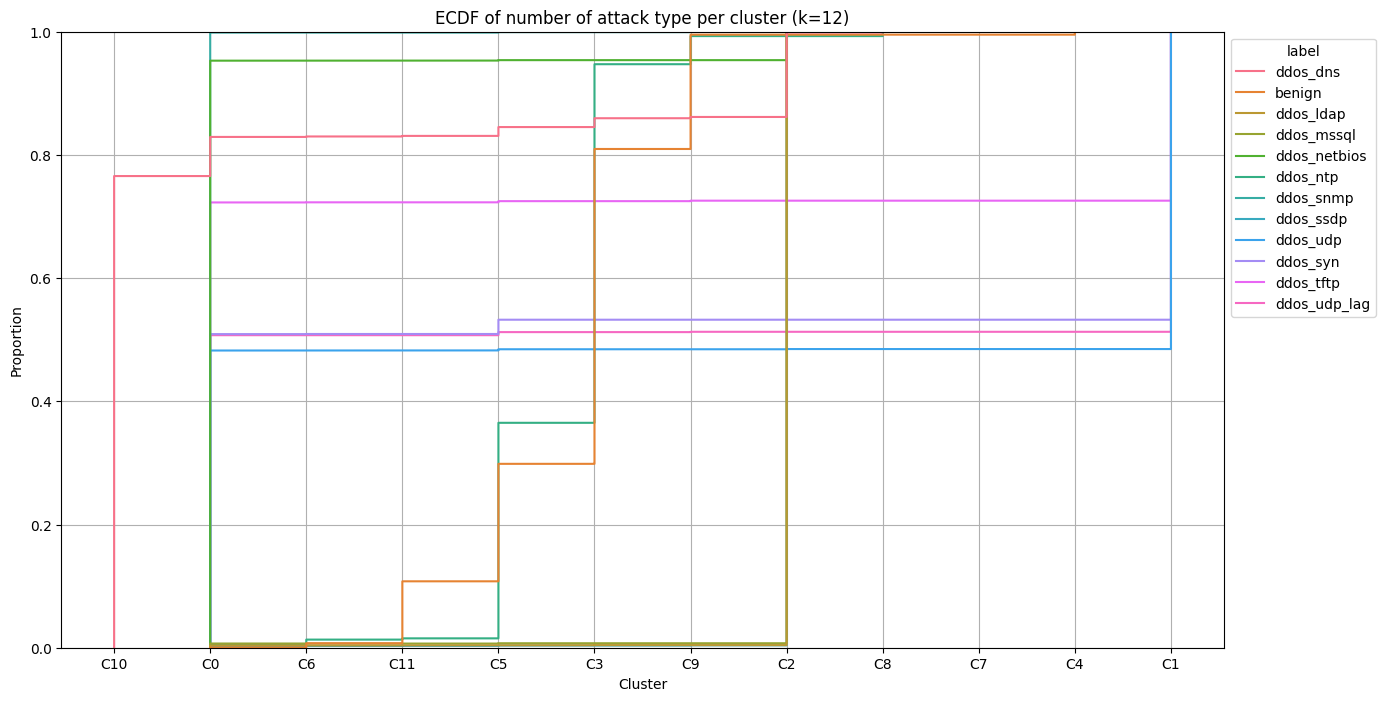

In [35]:
# ECDF of number of attack type  per cluster (k=12)
plt.figure(figsize=(15, 8))
ax = sns.ecdfplot(data=projection, x='cid3_GMM', hue='label')
sns.move_legend(ax, loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('ECDF of number of attack type per cluster (k=12)')
plt.grid()
plt.show()

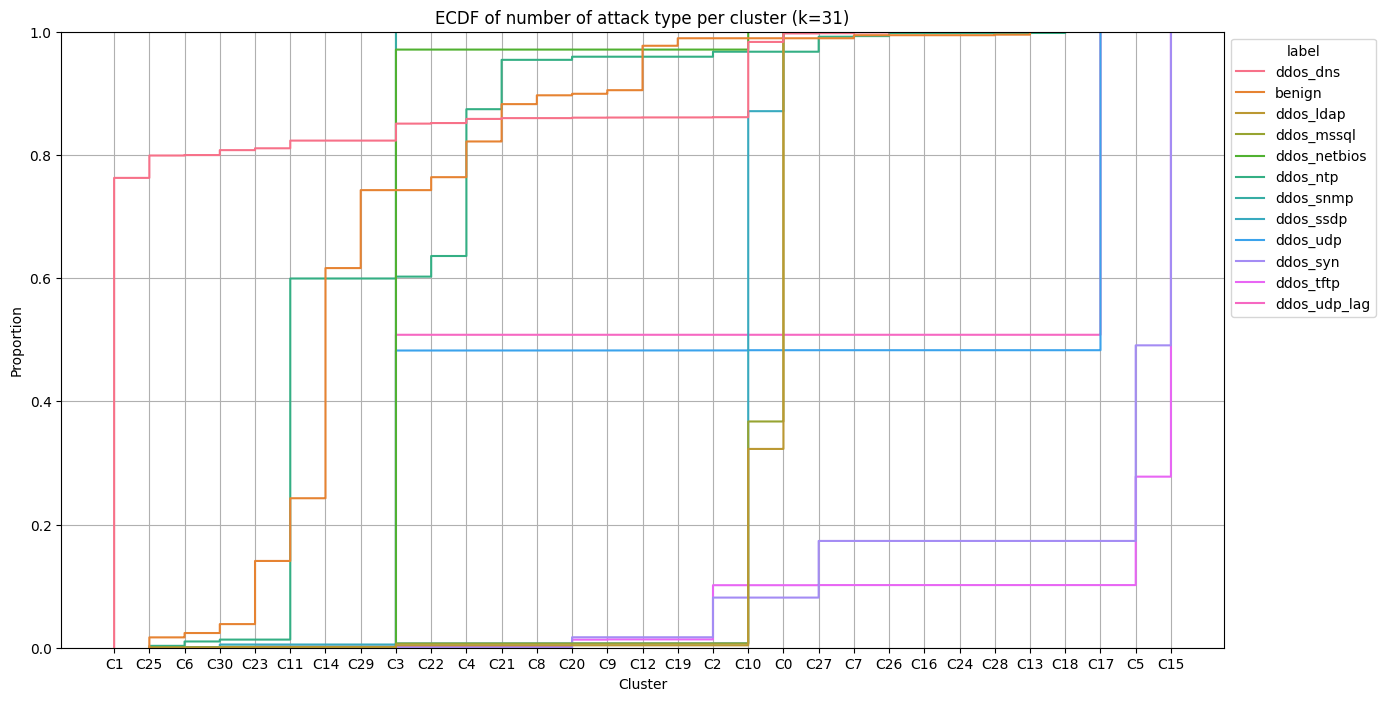

In [36]:
# ECDF of number of attack type per cluster (k=best_n)
plt.figure(figsize=(15, 8))
ax = sns.ecdfplot(data=projection, x='cidBest_GMM', hue='label')

plt.xlabel('Cluster')
plt.ylabel('Proportion')
sns.move_legend(ax, loc="upper left", bbox_to_anchor=(1, 1))
plt.title(f'ECDF of number of attack type per cluster (k={best_n})')
plt.grid()
plt.show()

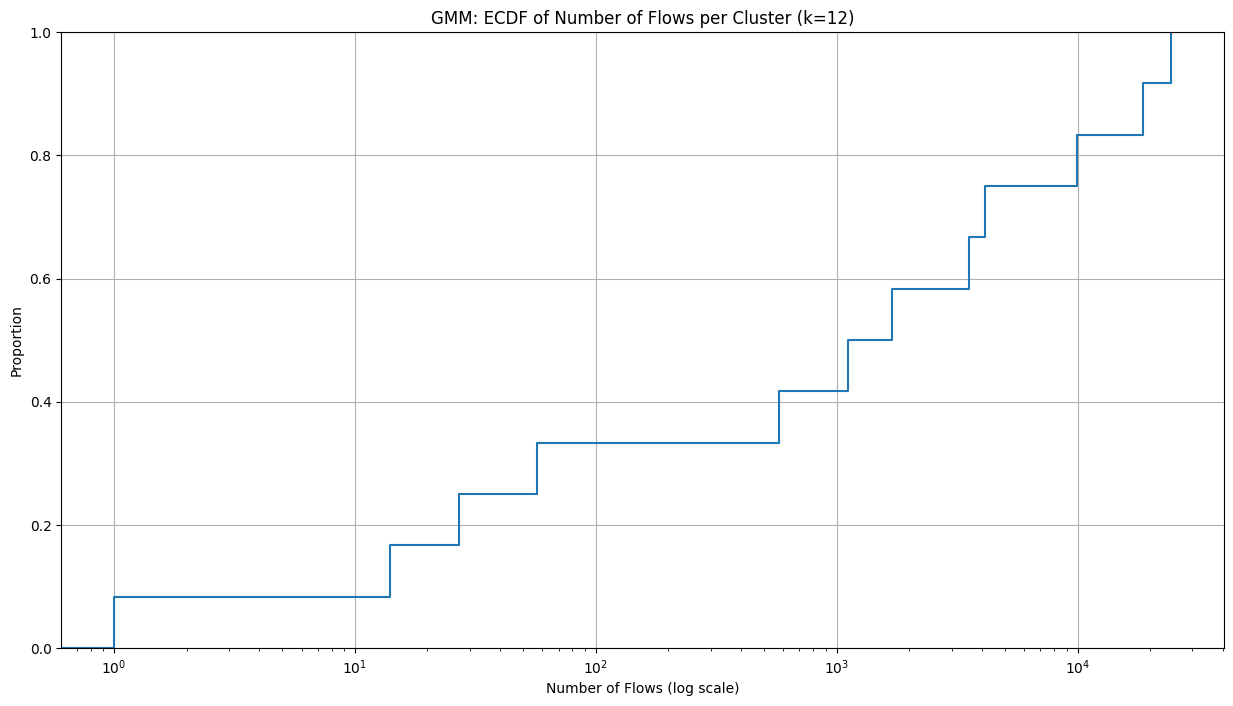

In [37]:
cluster_labels = projection.cid3_GMM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title('GMM: ECDF of Number of Flows per Cluster (k=12)')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

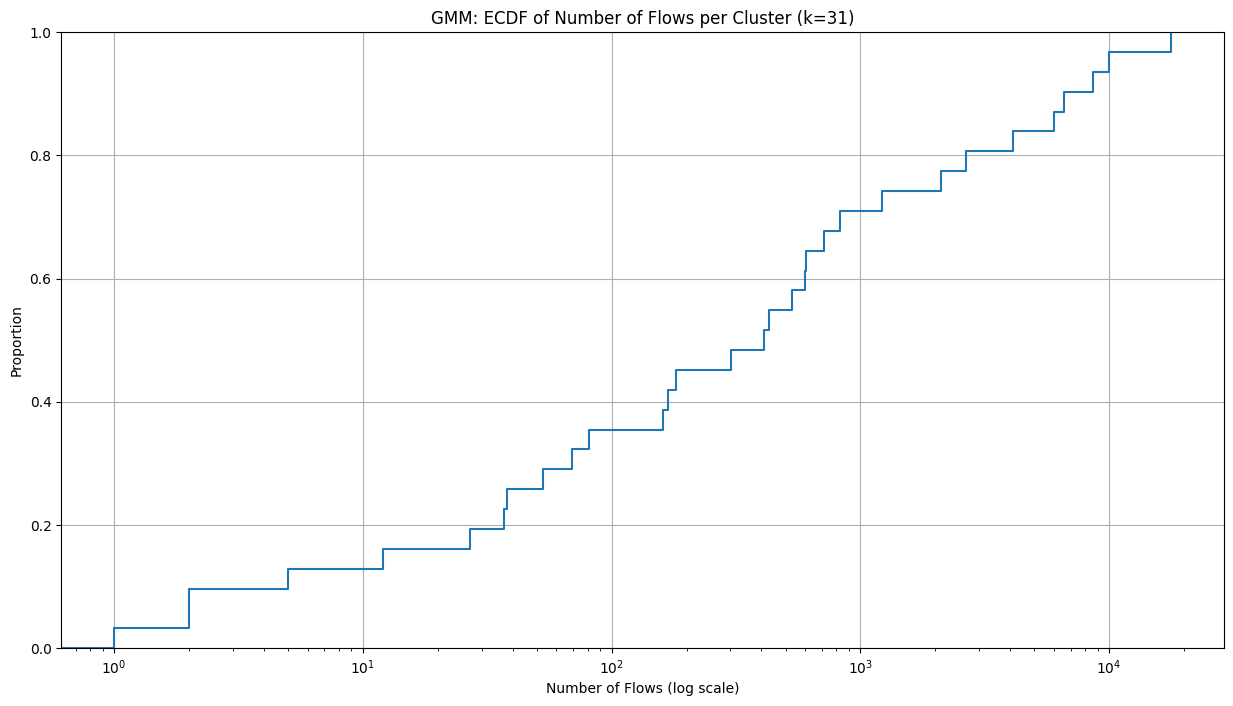

In [38]:
cluster_labels = projection.cidBest_GMM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title(f'GMM: ECDF of Number of Flows per Cluster (k={best_n})')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

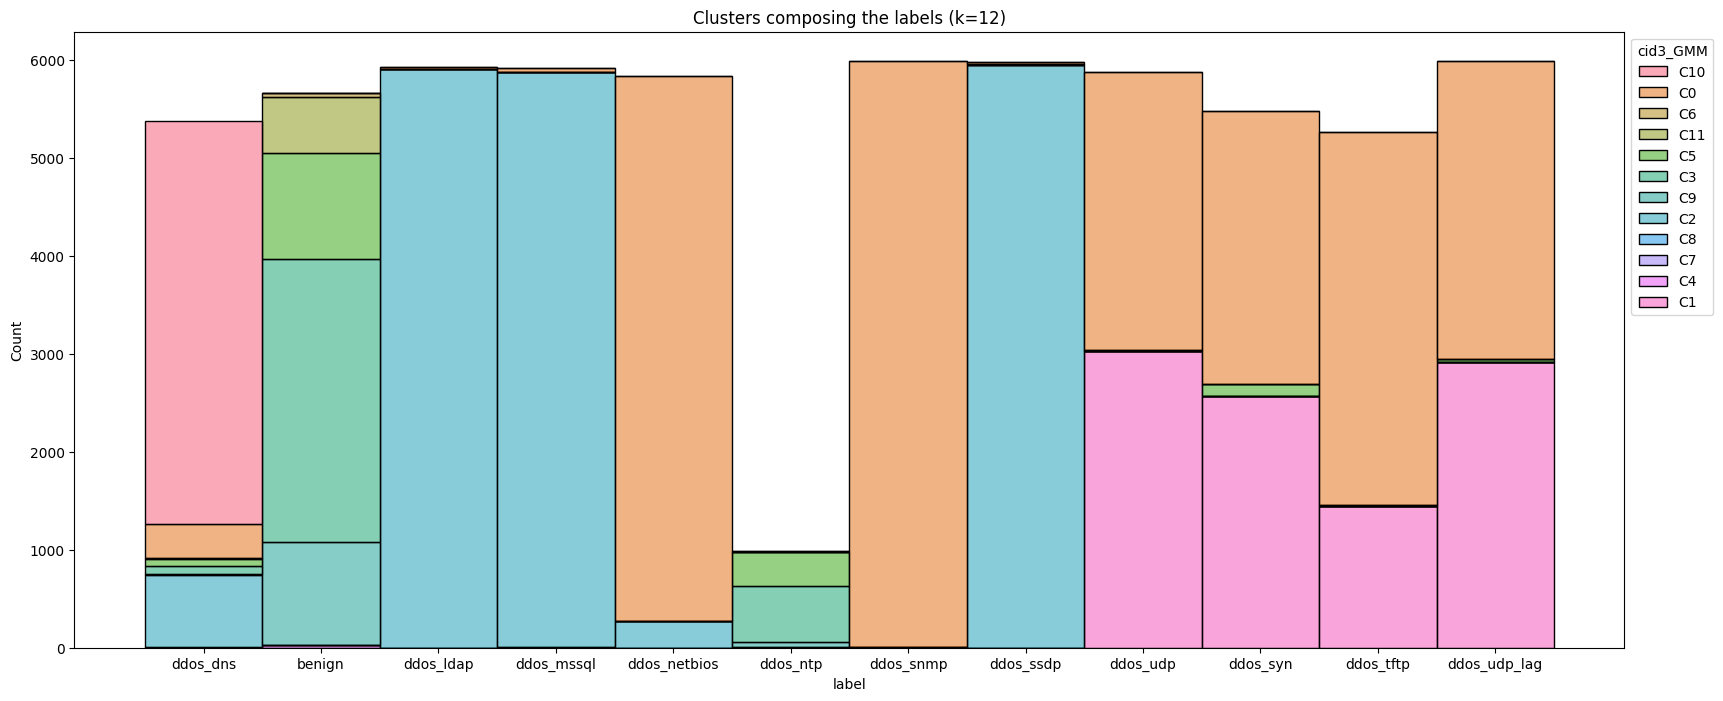

In [39]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "label", 
    hue = "cid3_GMM",
    multiple="stack",
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels (k=12)')
plt.show()

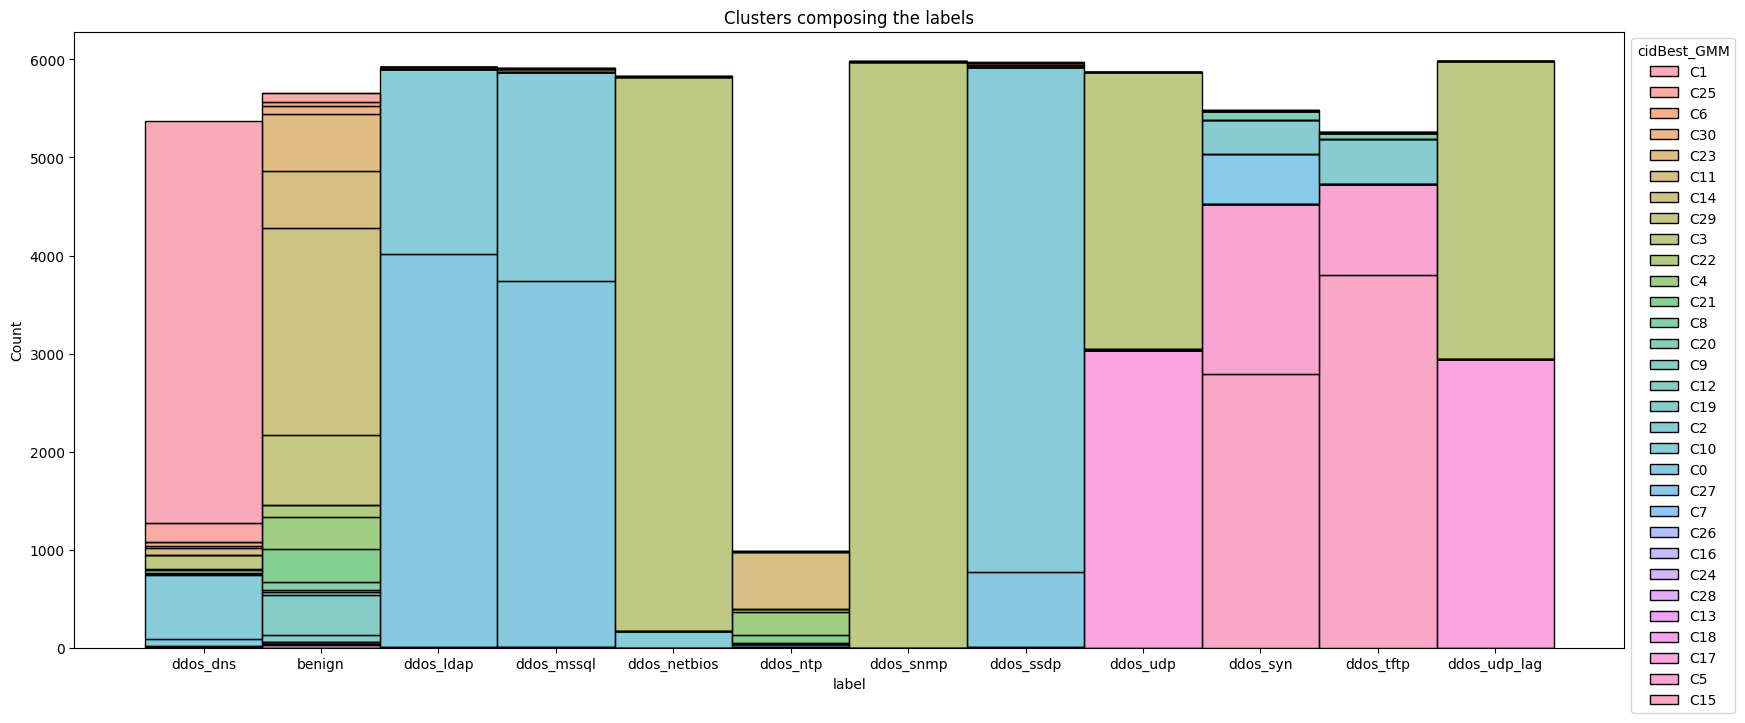

In [40]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "label", 
    hue = "cidBest_GMM", 
    multiple="stack",
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels')
plt.show()

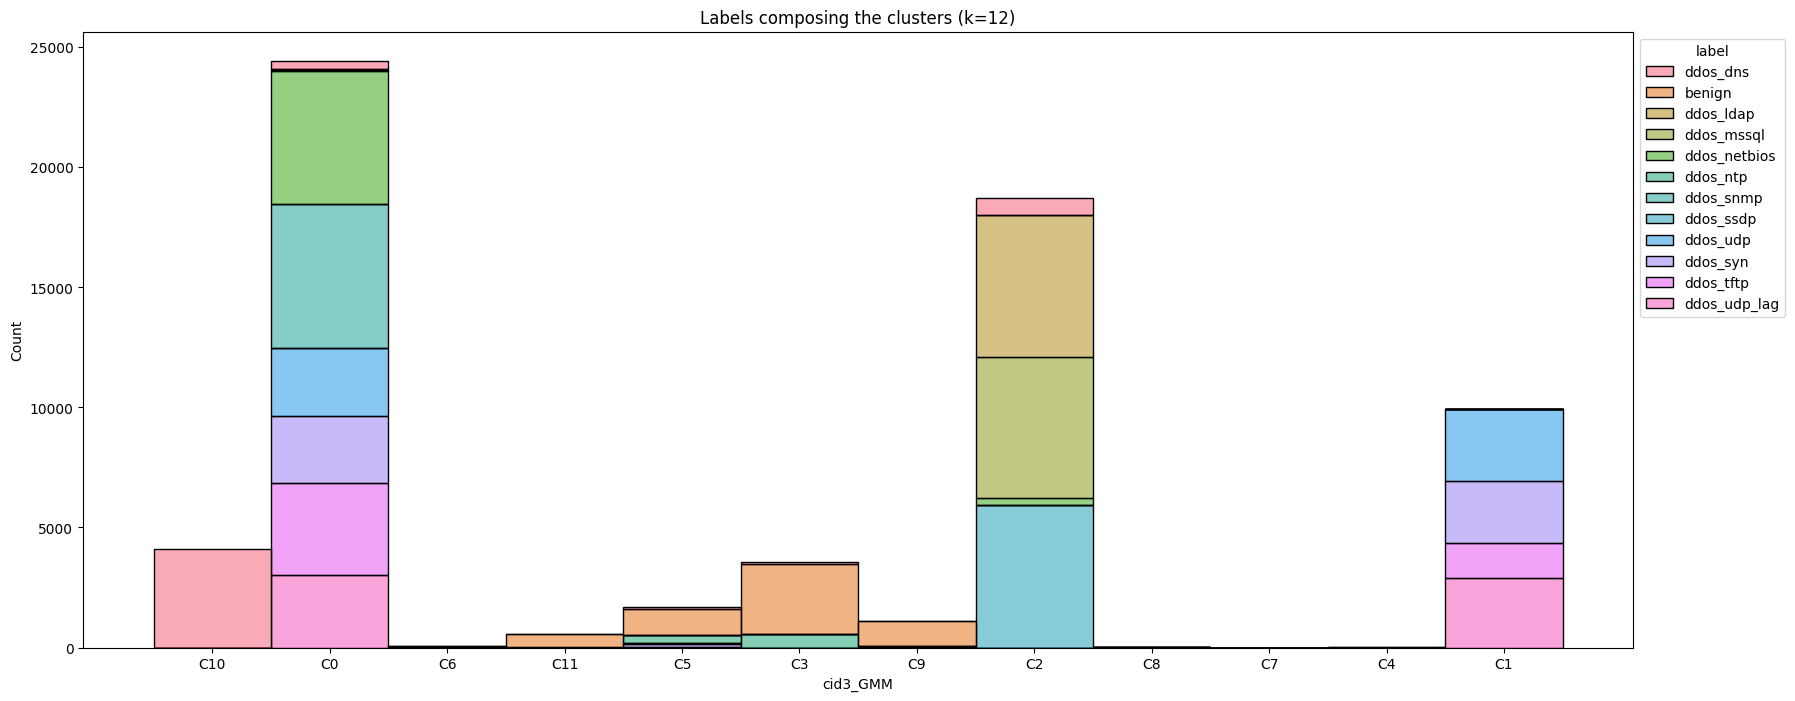

In [41]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "cid3_GMM", 
    hue = "label", 
    multiple="stack",
    alpha = 0.6
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters (k=12)')
plt.show()

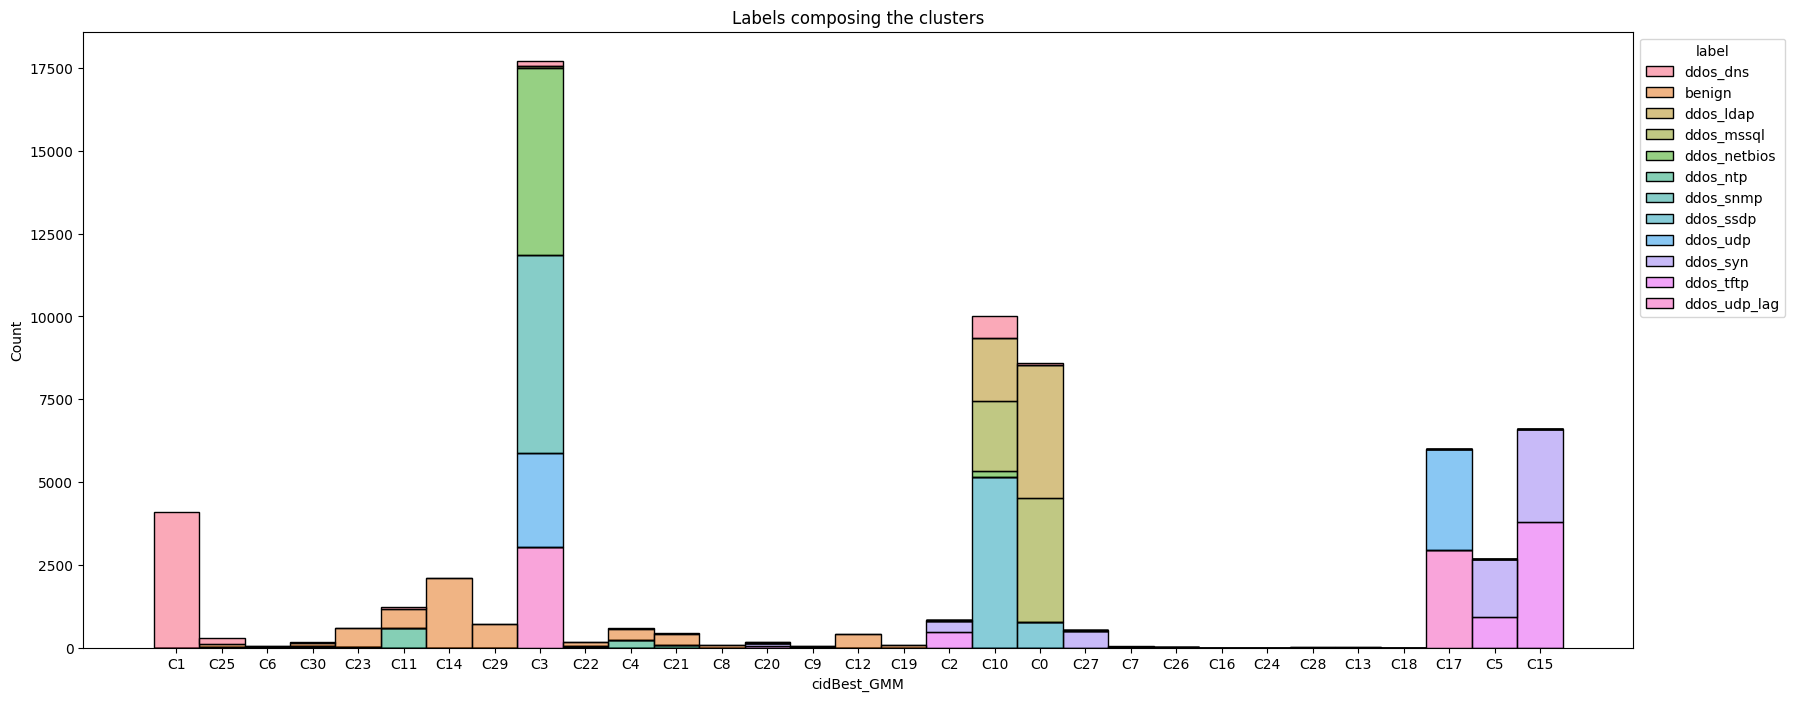

In [42]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "cidBest_GMM", 
    hue = "label", 
    multiple="stack",
    alpha = 0.6
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters')
plt.show()

## DBSCAN
**DBSCAN** is a density-based algorithm, we do not have to provide the number of clusters. The performance won't be evaluated by changing k but by varying two other parameters by performing a Grid Search:
- ``epsilon``: Maximum distance to be connected;
- ``min_samples``: Minimum number of neighbors to be a core point;

It consists of iterating over different values (combination) for two or more parameters, choosing the one leading to the best quality metrics. The number of clusters will depend on these two parameters.

Reference link: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN</a>.

In [7]:
# Let's first use the default options:
#   - eps: 0.5
#   - min_samples: 5

dbscan = DBSCAN()
cl_db_def = dbscan.fit_predict(X) # Get clusters ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_db_def)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_db_def)
ari = adjusted_rand_score(np.ravel(y), cl_db_def)

# report number and size of each cluster
(unique, counts)=np.unique( cl_db_def, return_counts=True)
print("Number of clusters (including noise): ", len(unique))
print("Size of each cluster: ", counts)
# report usupervised and supervised metric
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

Number of clusters (including noise):  150
Size of each cluster:  [ 2144    33   122  3358    66   671     7     5 20110  2016    45     6
   178   140   130    64    19   151   130   103    14    20    26     7
    29    18   120   174   285   121    39    15    13   115    10    46
    39    10    10    23    16    31    23    12     6    12    41    19
    11   803    35   106    19    50    22    41  9405 12785    11     7
     8    55    24    25     8    65    28     9     6    12     8     5
     5     7   115     6     5    36    20     7    46     5     5    13
     8     8     6     5     7     7    23    24     6    16    16    34
    70     8    17     8     8    16     5     7    10     5     5     6
     6     6     5     5    26    44    16     8    16    20    15     5
     6     5     5     6    15     9     6     7     7     5     7     5
     9     5     5     7     5  1379  5236    62  1340    15    15     7
     5     5    10   872    49    23]
Silhouette: 0.12
RI:

In [8]:
#Trying to tune DBSCAN
#eps:The maximum distance between two samples for one to be considered as in the neighborhood of the other, default 0.5. MOST IMPORTANT
#min_samples:The number of samples (or total weight) in a neighborhood for a point to be considered as a core point, default 5.

#eps ANALYSIS

eps_list=[]
shs_list = []
ri_list = []
ari_list = []
cluster_n_list = []
results = []


for e in np.arange(0.01, 1.2, 0.2):
  print(f'{e}---------------------------')
  dbscan = DBSCAN(eps = e)
  cl_labels = dbscan.fit_predict(X) # Get clusters ID

  # Unsupervised metric
  silhouette  = silhouette_score(X, cl_labels)
  # Supervised metrics
  ri = rand_score(np.ravel(y), cl_labels)
  ari = adjusted_rand_score(np.ravel(y), cl_labels)
  (unique, counts)=np.unique( cl_labels, return_counts=True)
  print("Size of each cluster: ", counts)
  print("Number of clusters: ", len(counts))
  print(f'Silhouette: {round(silhouette, 2)}')
  print(f'RI: {round(ri, 2)}')
  print(f'ARI: {round(ari, 2)}')
  eps_list.append(e)
  shs_list.append(silhouette)
  ri_list.append(ri)
  ari_list.append(ari)
  cluster_n_list.append(len(counts))
  results.append((e, silhouette, ri, ari, len(counts)))

results_eps_df = pd.DataFrame(results, columns=['eps', 'sh', 'ri', 'ari', 'clusters'])
results_eps_df.to_csv('resuls_eps_DBSCAN.csv', sep=',')

0.01---------------------------
Size of each cluster:  [40616  3034     5    13     7    12  5523    19    11    36    48  6988
     5    24    11    24     6    27    53    36    59    20    86    30
     7    37    15    36  2447    41    41    14    15     7    14    30
     7     6     6     8     9     5     5    10    16     7     5     6
     9     5     5     5     6    13     5    18    11    13     6     5
    14     9     5     8     7    14     9     9     5     6    14     7
    10     6    28     5     5     5    10     6     5     7     5     6
     5     5     5     8     5    10    11    15     5     5     5    19
    50    39    51    20    18     6    29     6     8    44     5    13
    92     6    37     5     5     7    13    10    40    14     7    28
    26    22     7     7    15     7     7     5    26    15     7     8
     5     6     5     5     5     5     7     7     9     5     6     9
    12  1067    11    16    10     6     5    25     9     8    17   

In [28]:
results_eps_df = pd.read_csv("resuls_eps_DBSCAN.csv", header=0, index_col=0, engine='python')
shs_list = np.array(results_eps_df[['sh']])
eps_list = np.array(results_eps_df[['eps']])
ri_list = np.array(results_eps_df[['ri']])
ari_list = np.array(results_eps_df[['ari']])

best eps:  [0.41]  with corresponding silhouette:  0.2314885950231696


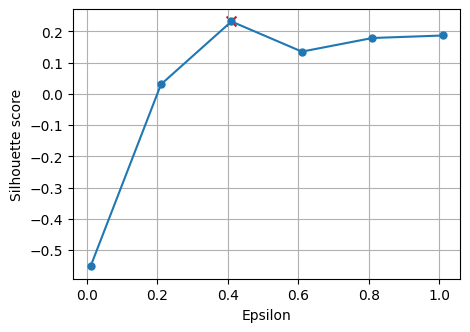

In [29]:
#eps curves
#ri, ari, shs, n_clusters

best_sh= np.max(shs_list)
best_e=eps_list[np.argmax(shs_list)]
print("best eps: ", best_e, " with corresponding silhouette: ", best_sh)

# Plot silhouette
plt.figure(figsize=(5, 3.5))
plt.plot(eps_list,shs_list, marker='o', markersize=5)
plt.scatter(best_e, best_sh, color='r', marker='x', s=50)
plt.grid()
plt.xlabel('Epsilon')
plt.ylabel('Silhouette score')
plt.show()

In [30]:
#min_samples ANALYSIS

mins_list=[]
shs_list = []
ri_list = []
ari_list = []
cluster_n_list = []
results = []


for m in range(1, 40, 2):
  print(f'{m}---------------------------')
  dbscan = DBSCAN(n_jobs=-1, min_samples = m)
  cl_labels = dbscan.fit_predict(X) # Get clusters ID

  # Unsupervised metric
  silhouette  = silhouette_score(X, cl_labels)
  # Supervised metrics
  ri = rand_score(np.ravel(y), cl_labels)
  ari = adjusted_rand_score(np.ravel(y), cl_labels)
  (unique, counts)=np.unique( cl_labels, return_counts=True)
  # print("Size of each cluster: ", counts)
  print("Number of clusters: ", len(counts))
  print(f'Silhouette: {round(silhouette, 2)}')
  print(f'RI: {round(ri, 2)}')
  print(f'ARI: {round(ari, 2)}')
  mins_list.append(m)
  shs_list.append(silhouette)
  ri_list.append(ri)
  ari_list.append(ari)
  cluster_n_list.append(len(counts))
  results.append((m, silhouette, ri, ari, len(counts)))

results_min_df = pd.DataFrame(results, columns=['m', 'sh', 'ri', 'ari', 'clusters'])
results_min_df.to_csv('results_min_DBSCAN.csv', sep=',')

1---------------------------
Number of clusters:  1794
Silhouette: -0.21
RI: 0.83
ARI: 0.25
3---------------------------
Number of clusters:  253
Silhouette: -0.03
RI: 0.83
ARI: 0.25
5---------------------------
Number of clusters:  150
Silhouette: 0.12
RI: 0.83
ARI: 0.26
7---------------------------
Number of clusters:  118
Silhouette: 0.3
RI: 0.9
ARI: 0.39
9---------------------------
Number of clusters:  99
Silhouette: 0.32
RI: 0.91
ARI: 0.41
11---------------------------
Number of clusters:  91
Silhouette: 0.31
RI: 0.91
ARI: 0.41
13---------------------------
Number of clusters:  82
Silhouette: 0.34
RI: 0.91
ARI: 0.41
15---------------------------
Number of clusters:  75
Silhouette: 0.35
RI: 0.91
ARI: 0.41
17---------------------------
Number of clusters:  66
Silhouette: 0.35
RI: 0.91
ARI: 0.41
19---------------------------
Number of clusters:  65
Silhouette: 0.35
RI: 0.91
ARI: 0.41
21---------------------------
Number of clusters:  63
Silhouette: 0.34
RI: 0.91
ARI: 0.41
23--------

In [33]:
results_min_df = pd.read_csv("results_min_DBSCAN.csv", header=0, index_col=0, engine='python')
shs_list = np.array(results_min_df[['sh']])
mins_list = np.array(results_min_df[['m']])
ri_list = np.array(results_min_df[['ri']])
ari_list = np.array(results_min_df[['ari']])

best mins:  [27]  with corresponding silhouette:  0.3478912692822842


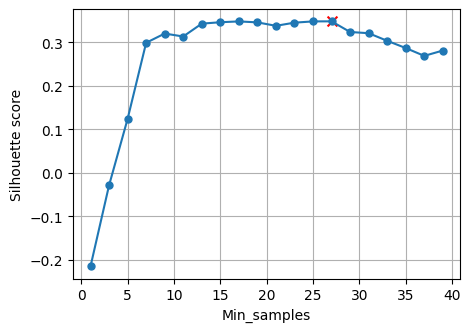

In [34]:
#min_samples curves
#ri, ari, shs, n_clusters

best_sh= np.max(shs_list)
best_mins=mins_list[np.argmax(shs_list)]
print("best mins: ", best_mins, " with corresponding silhouette: ", best_sh)

# Plot silhouette
plt.figure(figsize=(5, 3.5))
plt.plot(mins_list,shs_list, marker='o', markersize=5)
plt.scatter(best_mins, best_sh, color='r', marker='x', s=50)
plt.grid()
plt.xlabel('Min_samples')
plt.ylabel('Silhouette score')
plt.show()

In [6]:
# Now analyze the performance varying epsilon and min_samples.

shs = []

for eps in np.arange(0.4, 0.9, 0.1):
    eps = round(eps,3)
    for mins in range(22, 32):
        print(f'eps:{eps}, mins:{mins}---------------------------------------------')
        dbscan = DBSCAN(eps=eps, min_samples=mins, n_jobs=-1)
        cl_labels = dbscan.fit_predict(X)
        try:
            silhouette  = silhouette_score(X, cl_labels)
        except:
            silhouette = np.nan

        ri = rand_score(np.ravel(y), cl_labels)
        ari = adjusted_rand_score(np.ravel(y), cl_labels)
        (unique, counts)=np.unique( cl_labels, return_counts=True)
        shs.append((eps, mins, silhouette, ri, ari, len(counts)))
        print(f'Silhouette: {round(silhouette, 2)}')
        print(f'RI: {round(ri, 2)}')
        print(f'ARI: {round(ari, 2)}')
        print("Number of clusters: ", len(counts))
gs = pd.DataFrame(shs, columns=['eps', 'minPts', 'sh', 'ri', 'ari', 'cluster'])
gs.to_csv('dbscan_values2.csv', sep=',')

eps:0.4, mins:22---------------------------------------------
Silhouette: 0.26
RI: 0.9
ARI: 0.4
Number of clusters:  56
eps:0.4, mins:23---------------------------------------------
Silhouette: 0.24
RI: 0.9
ARI: 0.4
Number of clusters:  56
eps:0.4, mins:24---------------------------------------------
Silhouette: 0.24
RI: 0.9
ARI: 0.4
Number of clusters:  57
eps:0.4, mins:25---------------------------------------------
Silhouette: 0.23
RI: 0.9
ARI: 0.4
Number of clusters:  58
eps:0.4, mins:26---------------------------------------------
Silhouette: 0.22
RI: 0.9
ARI: 0.4
Number of clusters:  56
eps:0.4, mins:27---------------------------------------------
Silhouette: 0.23
RI: 0.9
ARI: 0.4
Number of clusters:  50
eps:0.4, mins:28---------------------------------------------
Silhouette: 0.23
RI: 0.9
ARI: 0.4
Number of clusters:  47
eps:0.4, mins:29---------------------------------------------
Silhouette: 0.23
RI: 0.9
ARI: 0.4
Number of clusters:  47
eps:0.4, mins:30------------------------

In [33]:
# Load previously saved results from DBSCAN
dbscan_result_df = pd.read_csv("dbscan_values2.csv", header=0, index_col=0, engine='python')
gs = pd.pivot_table(dbscan_result_df, columns='eps', index='minPts', values='sh', aggfunc=lambda x:x)

gs_sil = dbscan_result_df[['eps', 'minPts', 'sh']]
gs_sil = pd.pivot_table(gs_sil, columns='eps', index='minPts', values='sh', aggfunc=lambda x:x)

gs_ari = dbscan_result_df[['eps', 'minPts', 'ari']]
gs_ari = pd.pivot_table(gs_ari, columns='eps', index='minPts', values='ari', aggfunc=lambda x:x)


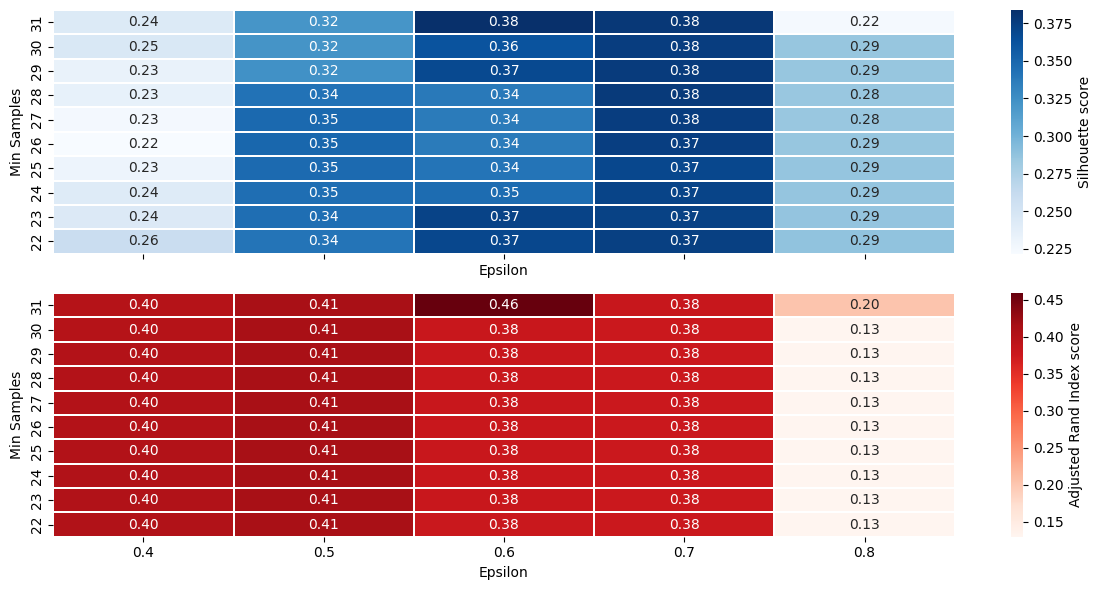

In [34]:
# Plot the silhouette score for the different values with a heatmap

fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
max_sil = gs_sil.max().max()
mins_max_sil = gs_sil.stack().idxmax()[0]
eps_max_sil = gs_sil.stack().idxmax()[1]
sns.heatmap(gs_sil, annot=True, fmt=".2f", cmap="Blues", ax=axes[0], cbar_kws={'label':'Silhouette score'}, linewidths=.005)
axes[0].invert_yaxis()
# axes[0].set_title(f'The maximum silhouette score is {max_sil} with min_samples of {mins_max_sil} and epsilon of {eps_max_sil}')
axes[0].set_xlabel("Epsilon")
axes[0].set_ylabel("Min Samples")

max_ari = gs_ari.max().max()
mins_max_ari = gs_ari.stack().idxmax()[0]
eps_max_ari = gs_ari.stack().idxmax()[1]
sns.heatmap(gs_ari, annot=True, fmt=".2f", cmap="Reds", ax=axes[1], cbar_kws={'label':'Adjusted Rand Index score'}, linewidths=.005)
axes[1].invert_yaxis()
# axes[1].set_title(f'The maximum adjusted rand index score is {max_ari} with min_samples of {mins_max_ari} and epsilon of {eps_max_ari}')
axes[1].set_ylabel("Min Samples")
axes[1].set_xlabel("Epsilon")

plt.tight_layout()
plt.show()

In [15]:
# Report the results of the best combination based on silhouette and adjusted rand index
eps_best = 0.6
min_samples_best = 31
dbscan = DBSCAN(eps=eps_best, min_samples=min_samples_best )
cl_labels = dbscan.fit_predict(X) # Get clusters ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_labels)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_labels)
ari = adjusted_rand_score(np.ravel(y), cl_labels)

# report number and size of each cluster
(unique, counts)=np.unique( cl_labels, return_counts=True)
best_n=len(unique)
print("Number of clusters (including noise): ", len(unique))
print("Size of each cluster: ", counts)
# report usupervised and supervised metric
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

Number of clusters (including noise):  45
Size of each cluster:  [4200  104 3358  672 6188 2020   45  101  140  130  149  130  103  120
  284  121  116   46   40  170   42 9598  237 8264   49 8616 9310   53
   46   65   41  115   46   34   70   35   36   32  779 1046 5234 1337
   28  841   48]
Silhouette: 0.38
RI: 0.91
ARI: 0.46


### PCA clusters visualization

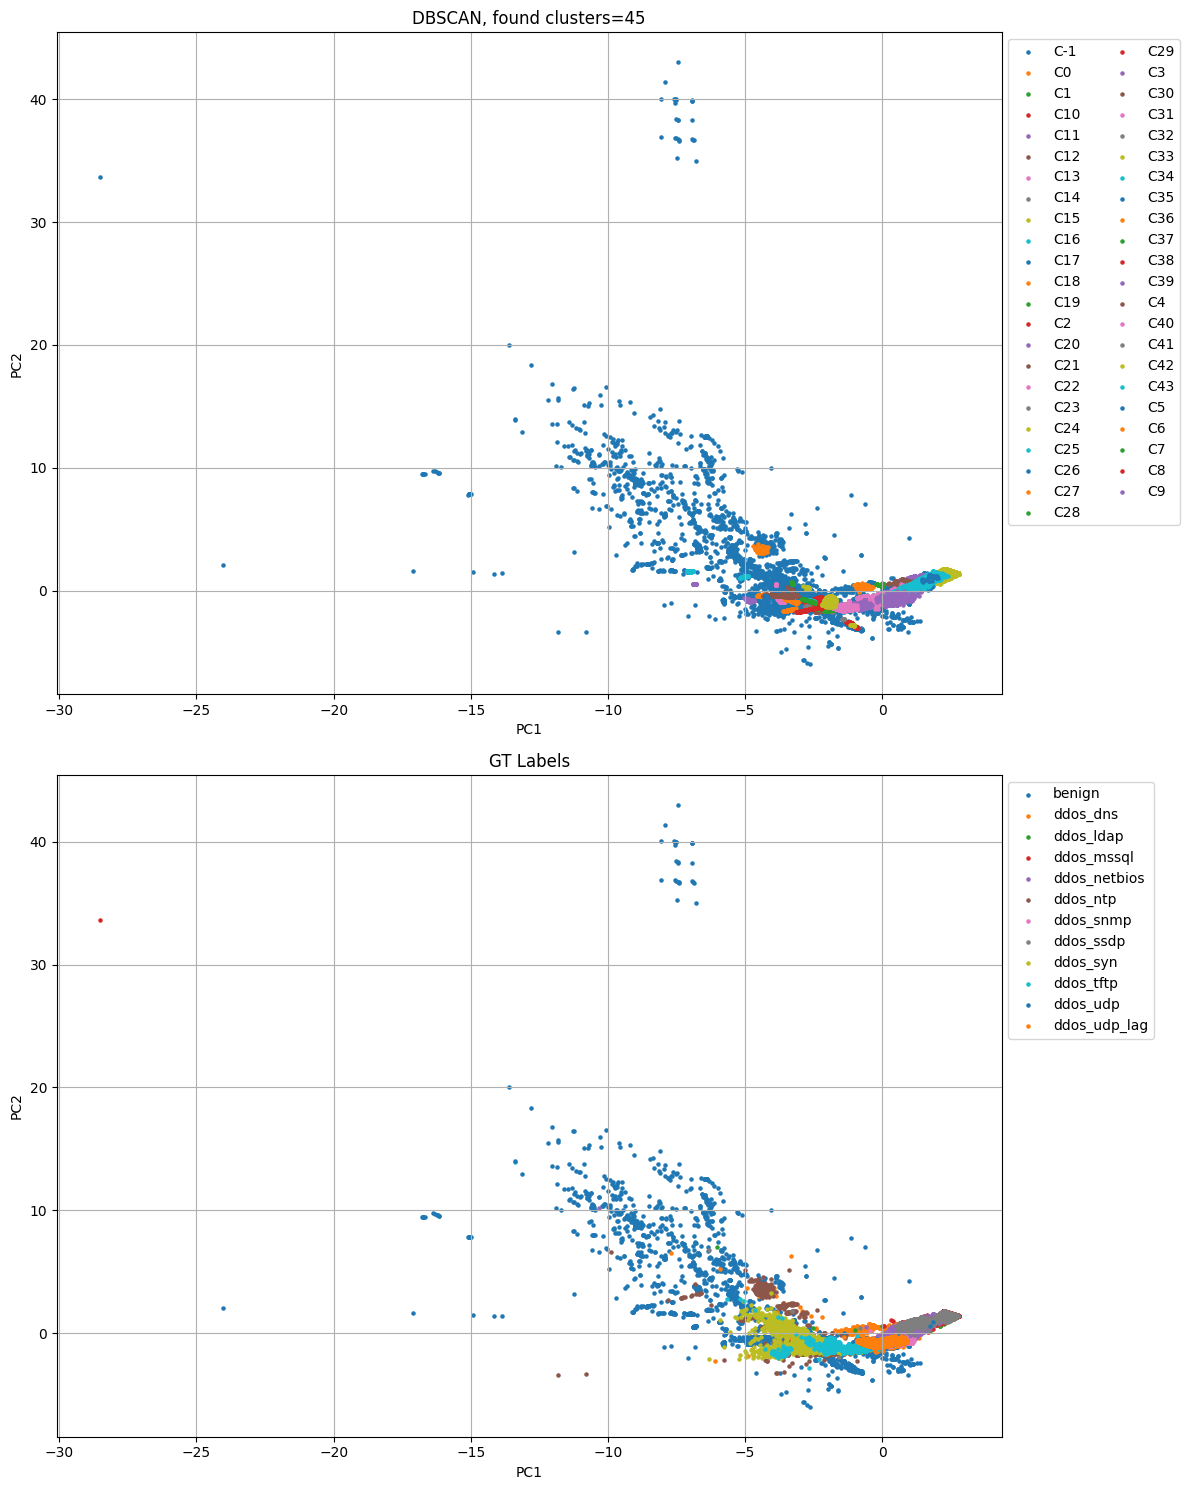

In [19]:
best_n=len(unique)

projection['cidBest_DBSCAN'] = [f'C{x}' for x in cl_labels]
projection['label'] = y.reshape(-1)

fig, axs = plt.subplots(2, 1, figsize=(12, 15))

for i in np.unique(projection.cidBest_DBSCAN):
    subdf = projection[projection.cidBest_DBSCAN==i]
    axs[0].scatter(subdf[0], subdf[1], label=i, s=5)
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=2)

axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title(f'DBSCAN, found clusters={best_n}')

for i in np.unique(y):
    subdf = projection[projection.label==i]
    axs[1].scatter(subdf[0], subdf[1], label=i, s=5)
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title('GT Labels')


plt.tight_layout()
plt.show()

### t-SNE clusters visualization

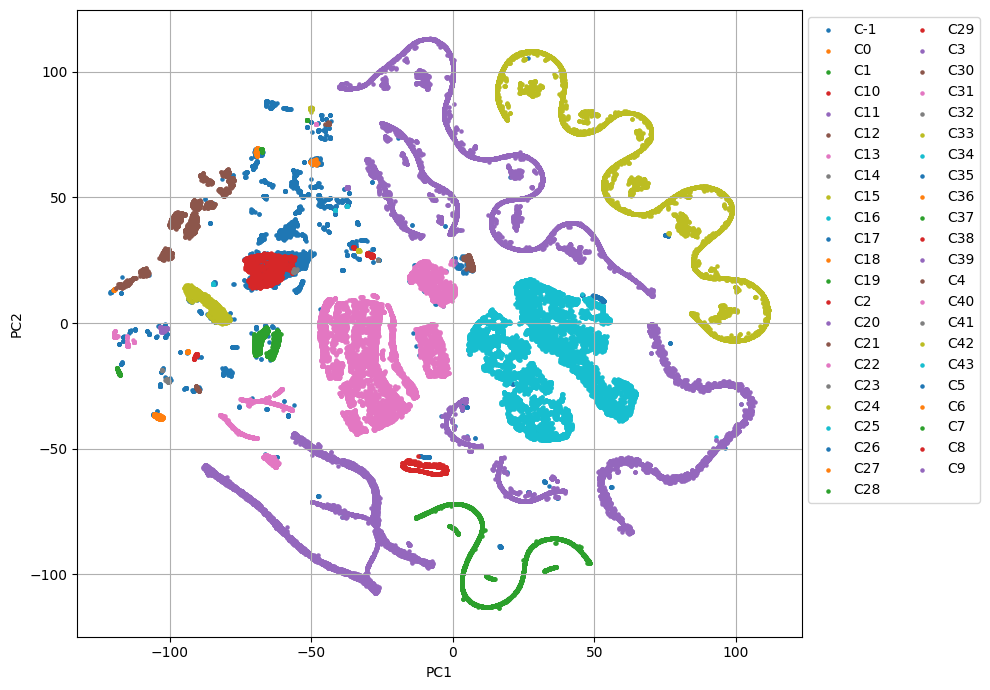

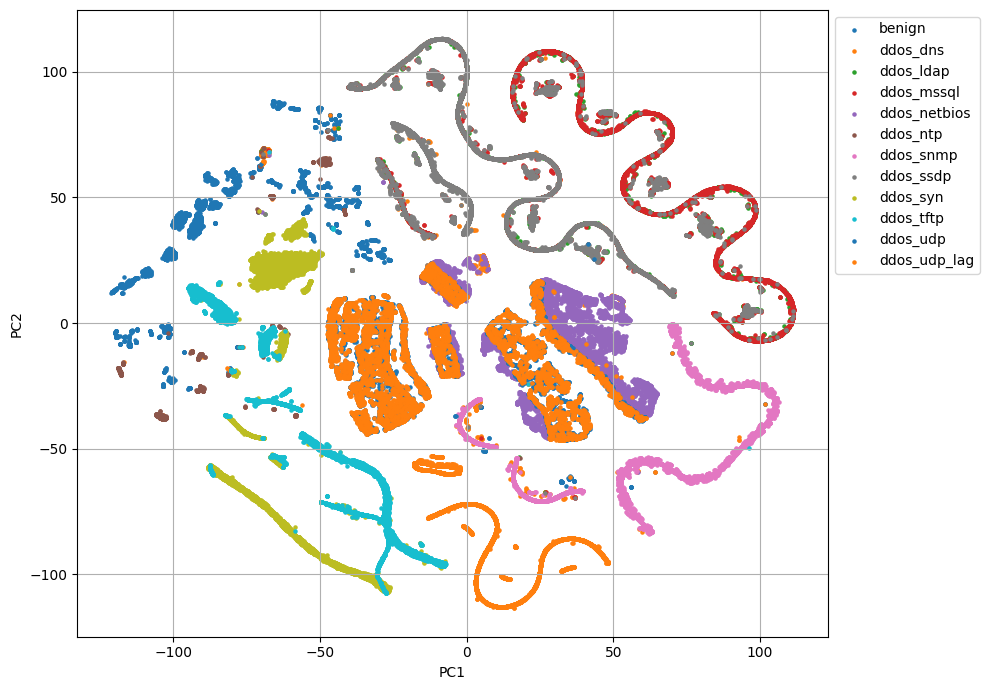

In [31]:
# First graph: DBSCAN clusters
plt.figure(figsize=(10, 7))
for i in np.unique(projection_tsne.cidBest_DBSCAN):
    subdf = projection_tsne[projection_tsne.cidBest_DBSCAN == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.title(f'DBSCAN, found clusters={best_n}')
plt.tight_layout()
plt.show()

# Second graph: Ground truth labels
plt.figure(figsize=(10, 7))
for i in np.unique(y):
    subdf = projection_tsne[projection_tsne.label == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.title('GT Labels')
plt.tight_layout()
plt.show()


### Clusters analysis

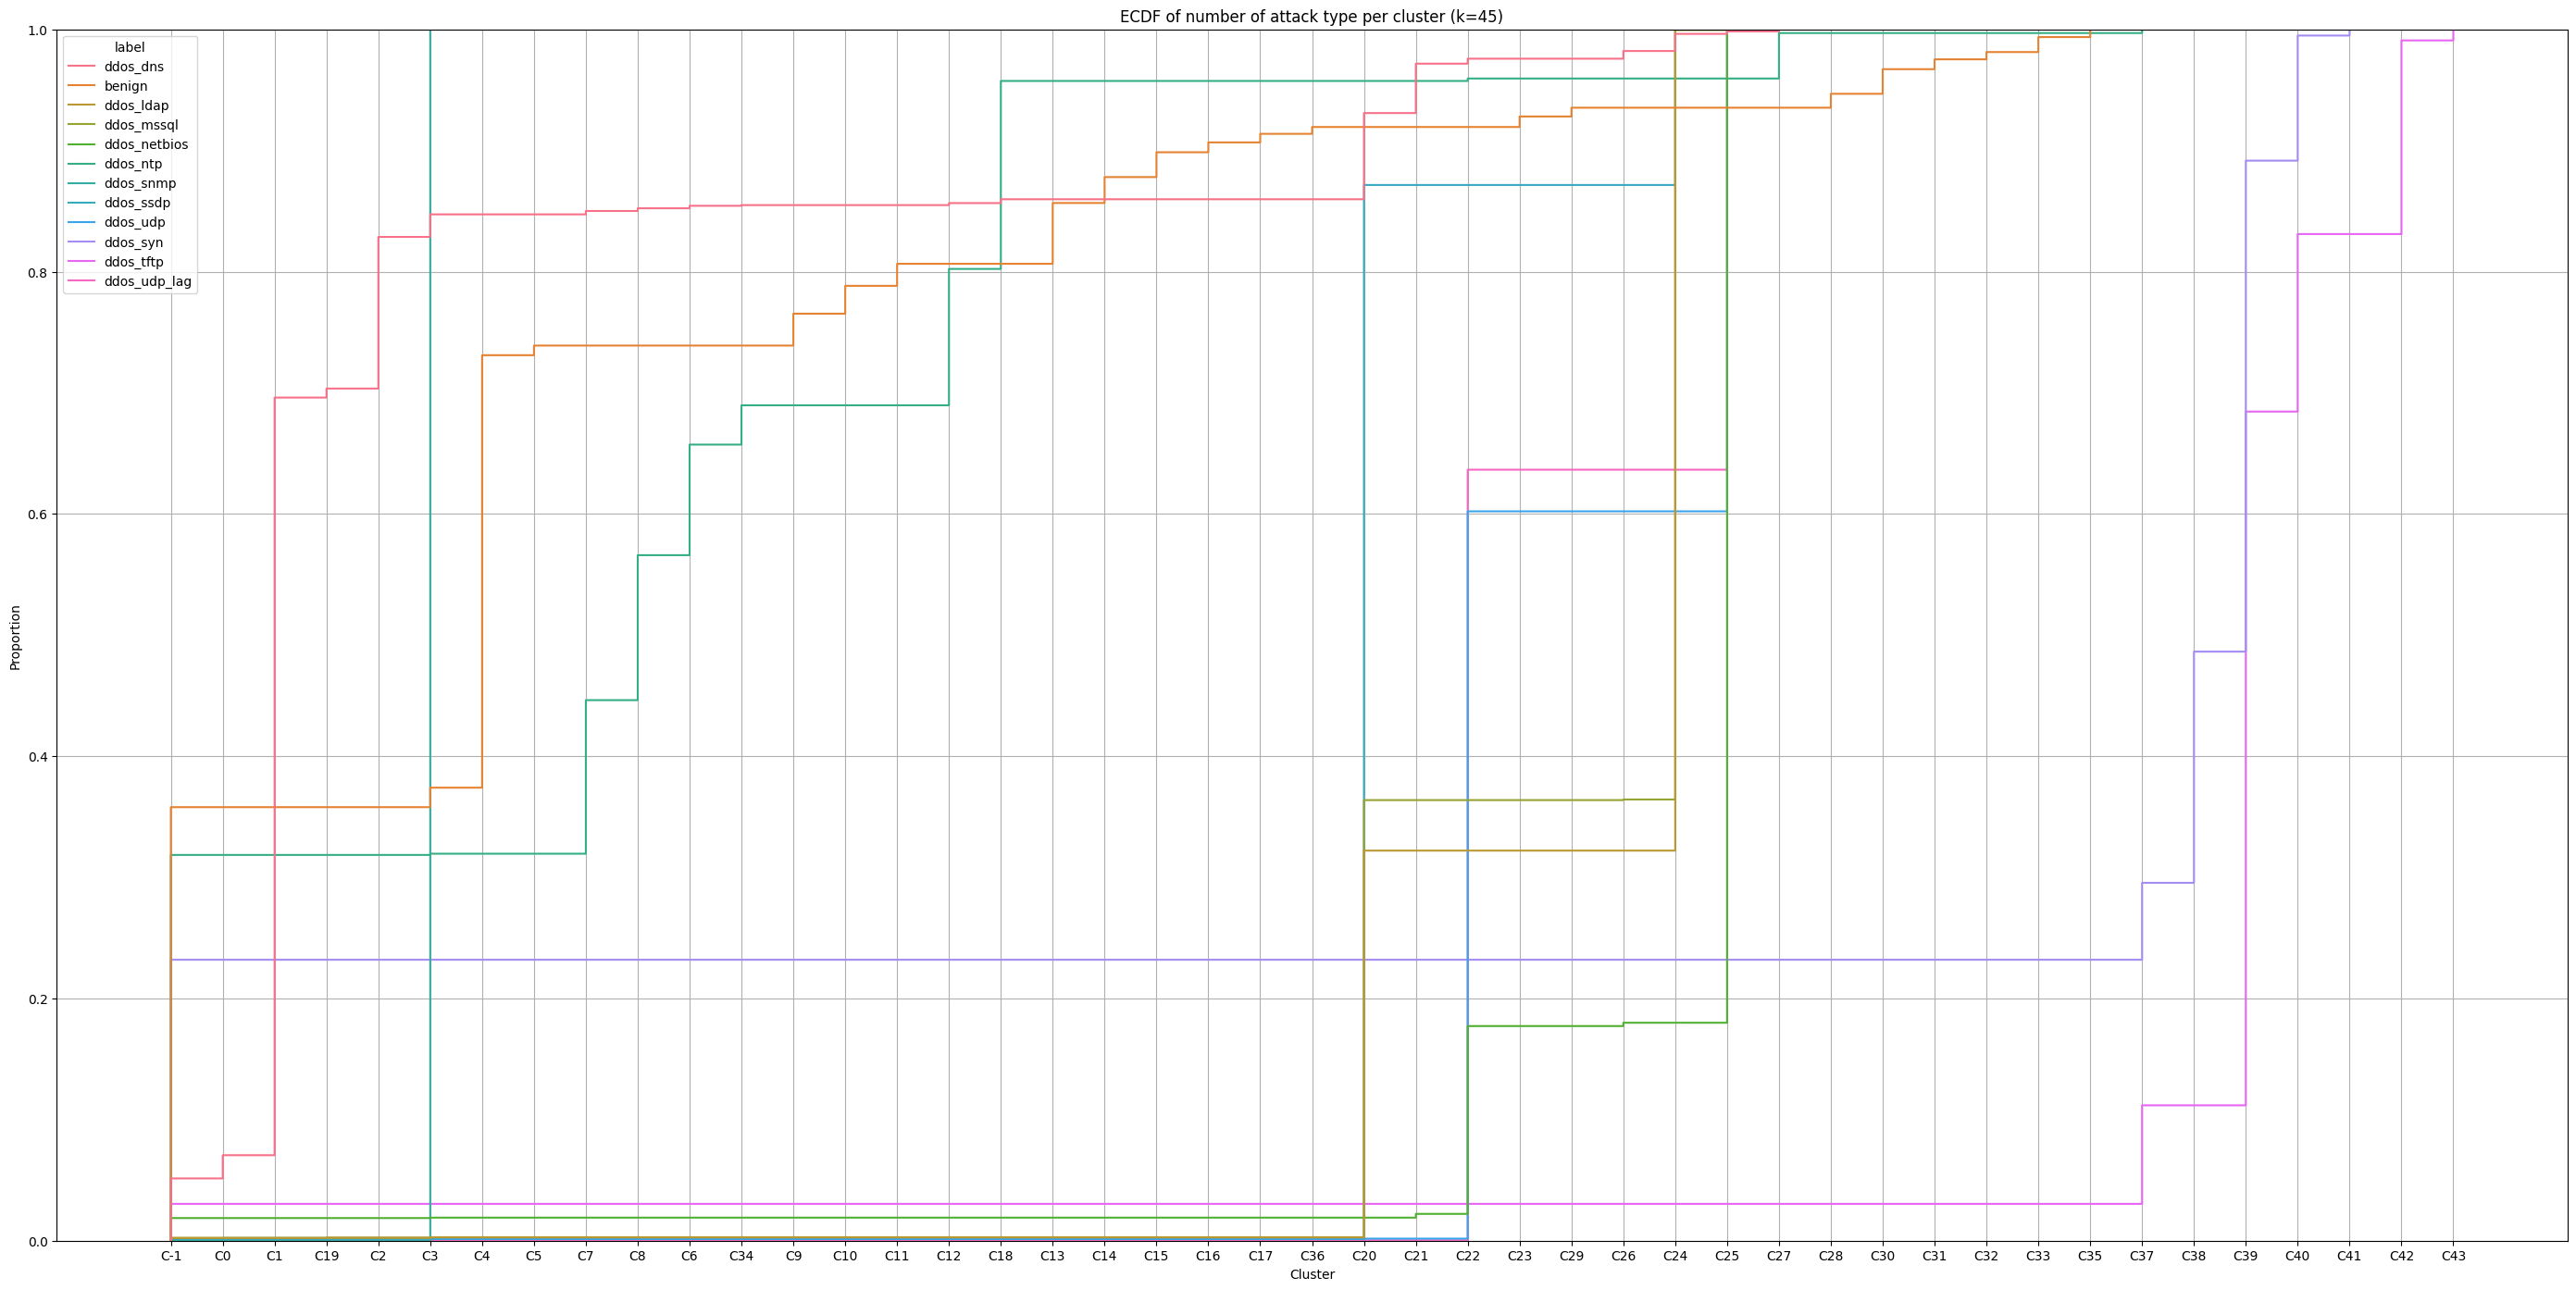

In [23]:
# ECDF of number of attack type per cluster (k=best_n)
plt.figure(figsize=(35, 17))
sns.ecdfplot(data=projection, x='cidBest_DBSCAN', hue='label')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title(f'ECDF of number of attack type per cluster (k={best_n})')
plt.grid()
plt.show()

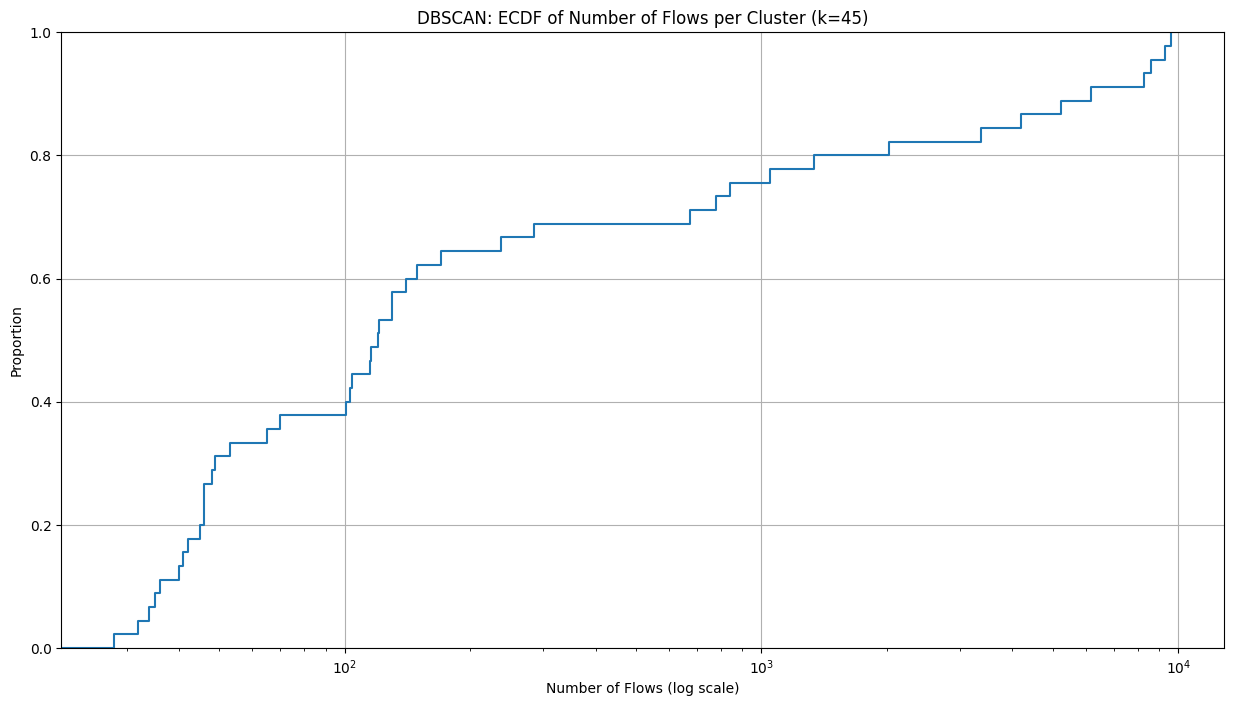

In [24]:
# ECDF of Number of Flows per Cluster
(unique, counts)=np.unique( cl_labels, return_counts=True)
cluster_sizes = counts
sorted_sizes = np.sort(cluster_sizes)

# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title(f'DBSCAN: ECDF of Number of Flows per Cluster (k={best_n})')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

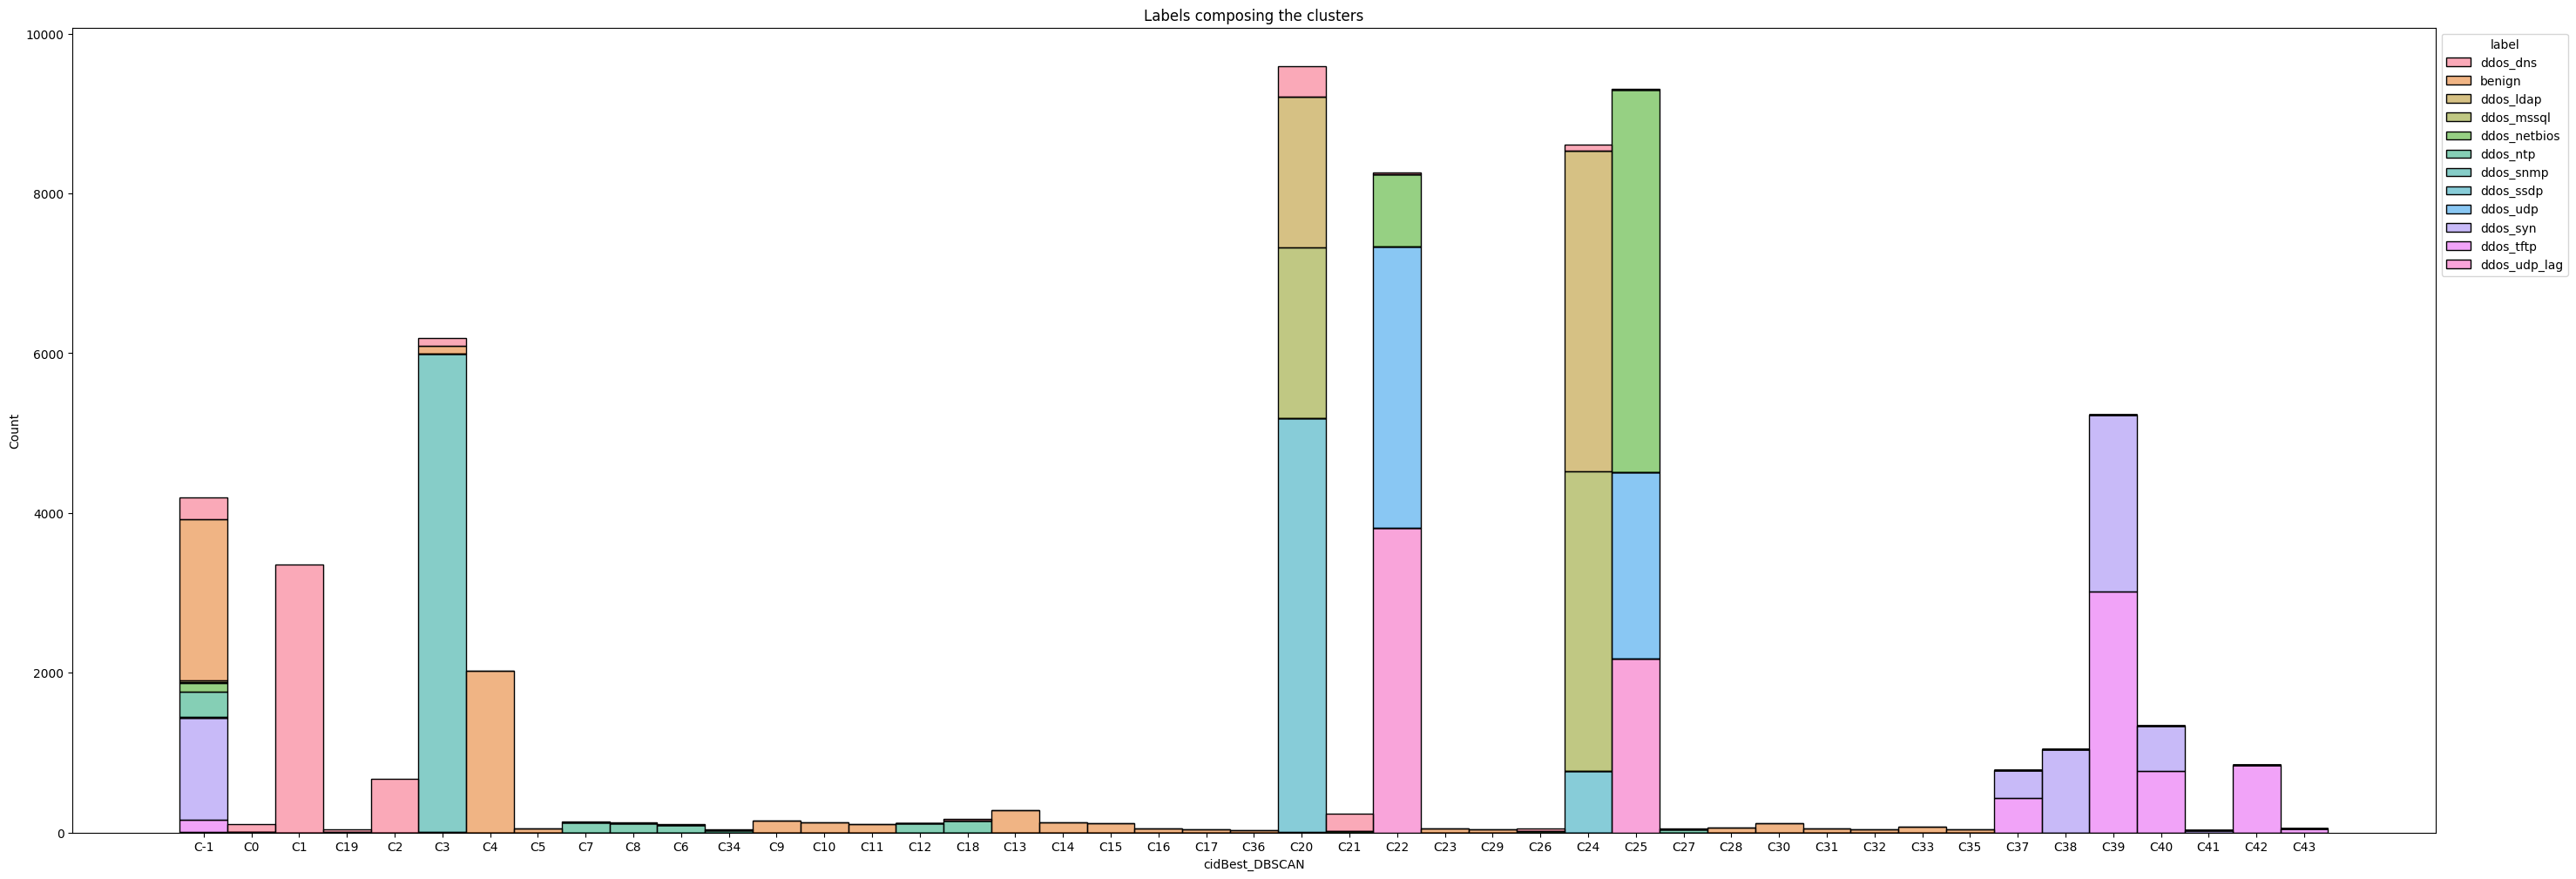

In [25]:
plt.figure(figsize = (35, 12))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "cidBest_DBSCAN", 
    hue = "label", 
    multiple="stack",
    # bins = 50,
    # binrange = (0,49),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters')
plt.show()

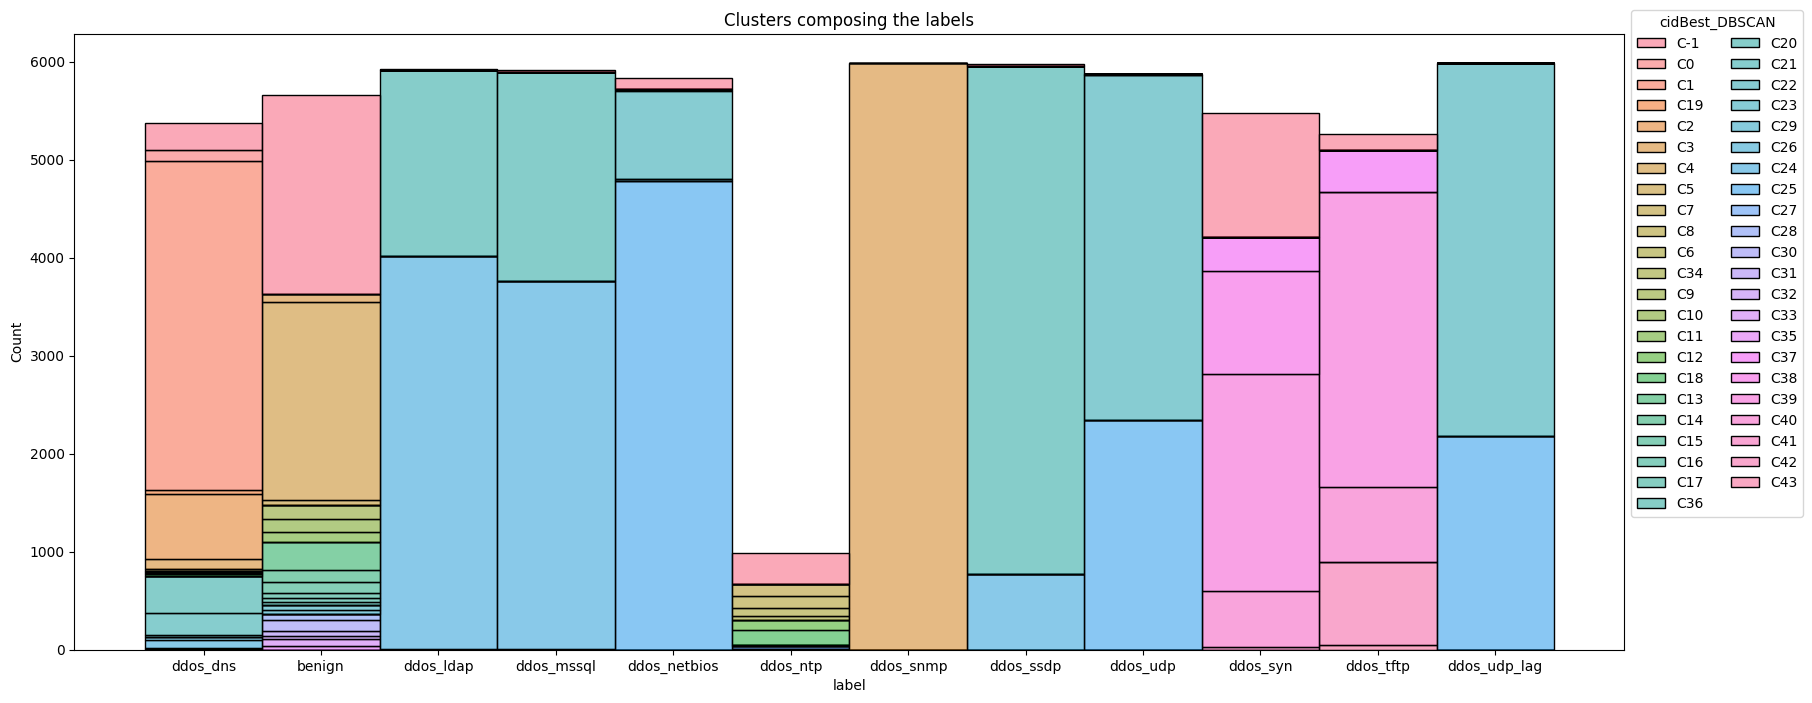

In [27]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "label",
    hue = "cidBest_DBSCAN",
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.05), ncol=2)

#plt.yscale("log")
plt.title('Clusters composing the labels')
plt.show()